### Readme
notebook que carga y analiza el fichero JSON con información de repositorios
los datos se han obtenido via API GraphQL y REST API de github

### Carga de librerías y fichero de datos. comprobaciones básicas

In [1]:
# imports de librerías requeridas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import json
from tabulate import tabulate
import locale

In [2]:
#pd.set_option('display.precision', 2)  # Configurar la precisión de decimales

# Configurar la visualización para que los números se muestren en formato europeo
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x).replace(',', 'X').replace('.', ',').replace('X', '.'))

In [3]:
DATA_FILE='D:\\Dev\\github-scrapping-02\\Data\\xmerge-metadata.json'

In [4]:
#compression = None if DATA_FILE.endswith('.json') else 'infer'
#df = pd.read_json(DATA_FILE, compression=compression)

# Abrimos y leemos el archivo JSON
with open(DATA_FILE, 'r') as f:
    repos = [json.loads(line) for line in f]


In [5]:
# Convertimos los datos a un DataFrame de pandas para mejor visualización
df = pd.json_normalize(repos)

In [6]:
df.head()

,name,description,stargazerCount,forkCount,createdAt,updatedAt,pushedAt,diskUsage,isArchived,isEmpty,...,issues.totalCount,forks.totalCount,assignableUsers.totalCount,deployments.totalCount,environments.totalCount,milestones.totalCount,releases.totalCount,pullRequests.totalCount,watchers.totalCount,licenseInfo
0,Parsr,"Transforms PDF, Documents and Images into Enri...",5755,306,2019-08-05T12:43:53Z,2024-09-01T17:24:35Z,2023-12-03T13:27:21Z,55148,False,False,...,163,305,4,0,0,0,26,504,81,NaN
1,Yet-Another-EfficientDet-Pytorch,The pytorch re-implement of the official effic...,5200,1268,2020-04-06T03:27:06Z,2024-08-22T08:04:26Z,2021-10-24T02:13:31Z,9068,False,False,...,716,1251,1,0,0,0,4,37,108,NaN
2,nit,Git of Web3 assets,4452,8,2022-04-20T08:21:14Z,2024-08-08T16:18:20Z,2024-07-29T14:17:11Z,548,False,False,...,26,8,4,0,0,0,4,13,12,NaN
3,new.css,A classless CSS framework to write modern webs...,3946,127,2020-05-03T03:18:57Z,2024-09-01T17:29:23Z,2024-03-16T08:40:48Z,310,False,False,...,40,112,1,100,2,0,1,43,39,NaN
4,golang-notes,Go source code analysis(zh-cn),3941,667,2018-04-04T05:21:51Z,2024-08-31T01:40:45Z,2022-07-18T09:30:00Z,8118,False,False,...,23,658,1,0,0,0,0,39,186,NaN


In [7]:
# crear copia de seguridad
df_copy=df.copy()

In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37133 entries, 0 to 37132
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        37133 non-null  object 
 1   description                 35042 non-null  object 
 2   stargazerCount              37133 non-null  int64  
 3   forkCount                   37133 non-null  int64  
 4   createdAt                   37133 non-null  object 
 5   updatedAt                   37133 non-null  object 
 6   pushedAt                    37133 non-null  object 
 7   diskUsage                   37133 non-null  int64  
 8   isArchived                  37133 non-null  bool   
 9   isEmpty                     37133 non-null  bool   
 10  isFork                      37133 non-null  bool   
 11  isInOrganization            37133 non-null  bool   
 12  isPrivate                   37133 non-null  bool   
 13  isTemplate                  371

In [9]:
# Obtener los nombres de las columnas
columnas = df.columns

# Ordenar las columnas alfabéticamente
columnas_ordenadas_alfabeticamente = sorted(columnas)

# Crear un diccionario para mapear tipos de datos a cadenas
tipo_dato_str = {col: str(df[col].dtype) for col in columnas}

# Ordenar las columnas por tipo de dato convertido a cadena
columnas_ordenadas_tipo_dato = sorted(columnas, key=lambda col: tipo_dato_str[col])

# Imprimir las columnas ordenadas alfabéticamente
print("Columnas ordenadas alfabéticamente:")
for col in columnas_ordenadas_alfabeticamente:
    print(col)
print(len(columnas_ordenadas_alfabeticamente))

print("\nColumnas ordenadas por tipo de dato:")
for col in columnas_ordenadas_tipo_dato:
    print(f"{col}: {tipo_dato_str[col]}")

Columnas ordenadas alfabéticamente:
assignableUsers.totalCount
contributors
createdAt
deployments.totalCount
description
diskUsage
environments.totalCount
forkCount
forks.totalCount
hasIssuesEnabled
hasProjectsEnabled
hasSponsorshipsEnabled
hasWikiEnabled
isArchived
isEmpty
isFork
isInOrganization
isPrivate
isTemplate
issues.totalCount
languages.nodes
licenseInfo
licenseInfo.name
mergeCommitAllowed
milestones.totalCount
name
owner.login
owner.url
primaryLanguage.name
pullRequests.totalCount
pushedAt
releases.totalCount
stargazerCount
updatedAt
viewerCanSubscribe
watchers.totalCount
36

Columnas ordenadas por tipo de dato:
isArchived: bool
isEmpty: bool
isFork: bool
isInOrganization: bool
isPrivate: bool
isTemplate: bool
hasIssuesEnabled: bool
hasWikiEnabled: bool
hasProjectsEnabled: bool
hasSponsorshipsEnabled: bool
mergeCommitAllowed: bool
viewerCanSubscribe: bool
licenseInfo: float64
stargazerCount: int64
forkCount: int64
diskUsage: int64
contributors: int64
issues.totalCount: int64


In [10]:
print(df_copy['contributors'].head())
print(df_copy['primaryLanguage.name'].head())
print(df_copy['licenseInfo'].head())
print(df_copy['licenseInfo.name'].head())

0    22
1    15
2     4
3    11
4    10
Name: contributors, dtype: int64
0          JavaScript
1    Jupyter Notebook
2          TypeScript
3                HTML
4                HTML
Name: primaryLanguage.name, dtype: object
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: licenseInfo, dtype: float64
0                        Apache License 2.0
1    GNU Lesser General Public License v3.0
2                               MIT License
3                               MIT License
4                                     Other
Name: licenseInfo.name, dtype: object


In [11]:
print(len(df_copy))

37133


In [12]:
# Contar el número de valores no nulos por columna
non_null_counts = df_copy.notnull().sum()
print(non_null_counts)

name                          37133
description                   35042
stargazerCount                37133
forkCount                     37133
createdAt                     37133
updatedAt                     37133
pushedAt                      37133
diskUsage                     37133
isArchived                    37133
isEmpty                       37133
isFork                        37133
isInOrganization              37133
isPrivate                     37133
isTemplate                    37133
hasIssuesEnabled              37133
hasWikiEnabled                37133
hasProjectsEnabled            37133
hasSponsorshipsEnabled        37133
mergeCommitAllowed            37133
viewerCanSubscribe            37133
contributors                  37133
owner.login                   37133
owner.url                     37133
licenseInfo.name              28331
primaryLanguage.name          37133
languages.nodes               37133
issues.totalCount             37133
forks.totalCount            

In [13]:
# Contar el número de valores nulos por columna
null_counts = df_copy.isnull().sum()
print(null_counts)

name                              0
description                    2091
stargazerCount                    0
forkCount                         0
createdAt                         0
updatedAt                         0
pushedAt                          0
diskUsage                         0
isArchived                        0
isEmpty                           0
isFork                            0
isInOrganization                  0
isPrivate                         0
isTemplate                        0
hasIssuesEnabled                  0
hasWikiEnabled                    0
hasProjectsEnabled                0
hasSponsorshipsEnabled            0
mergeCommitAllowed                0
viewerCanSubscribe                0
contributors                      0
owner.login                       0
owner.url                         0
licenseInfo.name               8802
primaryLanguage.name              0
languages.nodes                   0
issues.totalCount                 0
forks.totalCount            

In [14]:
# Contar el número de columnas
num_columns = df_copy.shape[1]

print(f"El número de columnas en el DataFrame es: {num_columns}")

El número de columnas en el DataFrame es: 36


In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37133 entries, 0 to 37132
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        37133 non-null  object 
 1   description                 35042 non-null  object 
 2   stargazerCount              37133 non-null  int64  
 3   forkCount                   37133 non-null  int64  
 4   createdAt                   37133 non-null  object 
 5   updatedAt                   37133 non-null  object 
 6   pushedAt                    37133 non-null  object 
 7   diskUsage                   37133 non-null  int64  
 8   isArchived                  37133 non-null  bool   
 9   isEmpty                     37133 non-null  bool   
 10  isFork                      37133 non-null  bool   
 11  isInOrganization            37133 non-null  bool   
 12  isPrivate                   37133 non-null  bool   
 13  isTemplate                  371

In [16]:
# licenseInfo no contiene valores. Esa información se encuentra en licenseInfo.name
df_copy.drop(columns=['licenseInfo'], inplace=True)


In [17]:
# Conversión de las columnas a tipo datetime
df_copy['createdAt'] = pd.to_datetime(df_copy['createdAt'])
df_copy['updatedAt'] = pd.to_datetime(df_copy['updatedAt'])
df_copy['pushedAt'] = pd.to_datetime(df_copy['pushedAt'])

# Verificar los tipos de datos
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37133 entries, 0 to 37132
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   name                        37133 non-null  object             
 1   description                 35042 non-null  object             
 2   stargazerCount              37133 non-null  int64              
 3   forkCount                   37133 non-null  int64              
 4   createdAt                   37133 non-null  datetime64[ns, UTC]
 5   updatedAt                   37133 non-null  datetime64[ns, UTC]
 6   pushedAt                    37133 non-null  datetime64[ns, UTC]
 7   diskUsage                   37133 non-null  int64              
 8   isArchived                  37133 non-null  bool               
 9   isEmpty                     37133 non-null  bool               
 10  isFork                      37133 non-null  bool          

### Calidad del dato

In [18]:
# Homogeneidad de tipos:
# Verificar si todas las filas de cada columna en df_copy contienen el mismo tipo de dato
for col in df_copy.columns:
    # Aplicar la función 'type' a cada valor y contar los tipos únicos
    tipo_unico = df_copy[col].apply(type).nunique()
    
    if tipo_unico == 1:
        print(f"Todos los valores de la columna '{col}' son del mismo tipo.")
    else:
        print(f"La columna '{col}' contiene diferentes tipos de datos.")
        
        # Mostrar algunos ejemplos de los tipos y valores heterogéneos
        tipos_diferentes = df_copy[col].apply(type).unique()  # Tipos diferentes en la columna
        print(f"Tipos encontrados en la columna '{col}': {tipos_diferentes}")
        
        # Filtrar los valores que no coinciden con el primer tipo de la columna
        for tipo in tipos_diferentes:
            ejemplos = df_copy[df_copy[col].apply(type) == tipo][col].head(3)  # Muestra hasta 3 ejemplos
            print(f"Ejemplos de valores del tipo {tipo}: {ejemplos.values}")
            
    print("-" * 50)


Todos los valores de la columna 'name' son del mismo tipo.
--------------------------------------------------
La columna 'description' contiene diferentes tipos de datos.
Tipos encontrados en la columna 'description': [<class 'str'> <class 'NoneType'>]
Ejemplos de valores del tipo <class 'str'>: ['Transforms PDF, Documents and Images into Enriched Structured Data'
 'The pytorch re-implement of the official efficientdet with SOTA performance in real time and pretrained weights.'
 'Git of Web3 assets']
Ejemplos de valores del tipo <class 'NoneType'>: [None None None]
--------------------------------------------------
Todos los valores de la columna 'stargazerCount' son del mismo tipo.
--------------------------------------------------
Todos los valores de la columna 'forkCount' son del mismo tipo.
--------------------------------------------------
Todos los valores de la columna 'createdAt' son del mismo tipo.
--------------------------------------------------
Todos los valores de la col

In [19]:
print(len(df_copy.columns))

35


In [20]:
df_copy.describe()

,stargazerCount,forkCount,diskUsage,contributors,issues.totalCount,forks.totalCount,assignableUsers.totalCount,deployments.totalCount,environments.totalCount,milestones.totalCount,releases.totalCount,pullRequests.totalCount,watchers.totalCount
count,"37.133,00","37.133,00","37.133,00","37.133,00","37.133,00","37.133,00","37.133,00","37.133,00","37.133,00","37.133,00","37.133,00","37.133,00","37.133,00"
mean,"641,12","122,96","53.996,00","9,35","72,75","118,58","12,56","70,10","0,66","0,68","10,18","100,16","20,18"
std,"1.138,41","412,37","1.031.773,29","16,71","305,57","397,57","127,53","1.780,57","34,54","4,37","41,43","458,74","40,05"
min,"98,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
25%,"252,00","29,00","475,00","1,00","5,00","28,00","1,00","0,00","0,00","0,00","0,00","2,00","8,00"
50%,"406,00","61,00","2.930,00","3,00","19,00","59,00","1,00","0,00","0,00","0,00","0,00","11,00","13,00"
75%,"691,00","122,00","16.785,00","9,00","56,00","118,00","3,00","0,00","0,00","0,00","6,00","48,00","23,00"
max,"36.939,00","43.148,00","105.078.627,00","100,00","26.175,00","42.880,00","2.267,00","287.890,00","5.262,00","229,00","1.000,00","23.809,00","2.675,00"


In [21]:
# Filtrar filas que contienen valores negativos en cualquier columna numérica
# Asegurarse de seleccionar solo las columnas numéricas del DataFrame
columnas_numericas = df_copy.select_dtypes(include=['number']).columns
print(f"Hay '{len(columnas_numericas)}' atributos numéricos")

# Verificar si alguna de las columnas numéricas contiene valores negativos
negativos = df_copy[columnas_numericas] < 0

# Mostrar las columnas que tienen valores negativos
columnas_con_negativos = negativos.any()

# Imprimir las columnas que tienen al menos un valor negativo
for columna, tiene_negativos in columnas_con_negativos.items():
    if tiene_negativos:
        print(f"'{columna}' tiene valores negativos********.")
    else:
        print(f"'{columna}' no tiene valores negativos.")


Hay '13' atributos numéricos
'stargazerCount' no tiene valores negativos.
'forkCount' no tiene valores negativos.
'diskUsage' no tiene valores negativos.
'contributors' no tiene valores negativos.
'issues.totalCount' no tiene valores negativos.
'forks.totalCount' no tiene valores negativos.
'assignableUsers.totalCount' no tiene valores negativos.
'deployments.totalCount' no tiene valores negativos.
'environments.totalCount' no tiene valores negativos.
'milestones.totalCount' no tiene valores negativos.
'releases.totalCount' no tiene valores negativos.
'pullRequests.totalCount' no tiene valores negativos.
'watchers.totalCount' no tiene valores negativos.


In [22]:
# Para verificar si existen duplicados, se crea clave primaria creada a partir de owner.login y name:
# Crear la nueva columna 'reponame' combinando 'owner.login' y 'name'
df_copy['reponame'] = df_copy['owner.login'] + '/' + df_copy['name']

In [23]:
df_copy['reponame'].head()

0                             axa-group/Parsr
1    zylo117/Yet-Another-EfficientDet-Pytorch
2                         numbersprotocol/nit
3                                  xz/new.css
4                         cch123/golang-notes
Name: reponame, dtype: object

In [24]:
# Duplicados
# Obtener los duplicados en la columna 'reponame'
duplicados = df_copy[df_copy.duplicated(subset='reponame', keep=False)]

if not duplicados.empty:
    # Agrupar por 'reponame' y mostrar índices de duplicados y el original
    for valor in duplicados['reponame'].unique():
        indices_duplicados = df_copy[df_copy['reponame'] == valor].index
        
        # Filtrar el índice del original
        indice_original = indices_duplicados[0]  # Primer índice como original
        indices_sin_original = indices_duplicados[1:]  # Índices de los duplicados sin el original

        print(f"Duplicado: '{valor}' en índices: {list(indices_sin_original)}")
        print(f"Original: '{valor}' en índice: {indice_original}\n")

        # Eliminar duplicados uno a uno
        for indice in indices_sin_original:
            df_copy = df_copy.drop(indice).reset_index(drop=True)
            print(f"Eliminado el duplicado en índice: {indice}")

else:
    print("No se encontraron registros duplicados en la columna 'reponame'.")


Duplicado: 'skyzh/mini-lsm' en índices: [16982]
Original: 'skyzh/mini-lsm' en índice: 16834

Eliminado el duplicado en índice: 16982
Duplicado: 'phoenixsky/fun_android_flutter' en índices: [16982]
Original: 'phoenixsky/fun_android_flutter' en índice: 16835

Eliminado el duplicado en índice: 16982
Duplicado: 'mmcloughlin/avo' en índices: [16985]
Original: 'mmcloughlin/avo' en índice: 16836

Eliminado el duplicado en índice: 16985
Duplicado: '52bp/52bp.github.io' en índices: [29338]
Original: '52bp/52bp.github.io' en índice: 29169

Eliminado el duplicado en índice: 29338
Duplicado: 'py2many/py2many' en índices: [29281]
Original: 'py2many/py2many' en índice: 29171

Eliminado el duplicado en índice: 29281
Duplicado: 'facebookresearch/ContrastiveSceneContexts' en índices: [29324]
Original: 'facebookresearch/ContrastiveSceneContexts' en índice: 29177

Eliminado el duplicado en índice: 29324
Duplicado: 'tretapey/svelte-pwa' en índices: [29324]
Original: 'tretapey/svelte-pwa' en índice: 29178


In [25]:
df_copy.shape

(37120, 36)

### Guardar df limpio

In [26]:
df_copy.to_json('D:\\Dev\\github-scrapping-02\\Data\\df_clean.json', orient='records', lines=True)

## Exploración

In [27]:
# Mostrar el resumen estadístico como texto formateado
resumen = df_copy.describe()
print(resumen.to_string())

       stargazerCount  forkCount      diskUsage  contributors  issues.totalCount  forks.totalCount  assignableUsers.totalCount  deployments.totalCount  environments.totalCount  milestones.totalCount  releases.totalCount  pullRequests.totalCount  watchers.totalCount
count       37.120,00  37.120,00      37.120,00     37.120,00          37.120,00         37.120,00                   37.120,00               37.120,00                37.120,00              37.120,00            37.120,00                37.120,00            37.120,00
mean           641,05     122,97      54.013,99          9,35              72,76            118,59                       12,56                   70,11                     0,66                   0,68                10,18                   100,17                20,18
std          1.138,44     412,44   1.031.953,50         16,72             305,62            397,63                      127,56                1.780,88                    34,54                   4,37    

### Serie temporal?

Fecha de creación más antigua: 2018
Fecha de creación más reciente: 2024
createdAt
2018    10995
2019     8875
2020     7194
2021     4426
2022     2964
2023     2194
2024      472
Name: count, dtype: int64
count                                  37120
mean     2020-02-19 03:46:37.047333376+00:00
min                2018-01-01 00:20:19+00:00
25%      2018-10-29 16:24:22.750000128+00:00
50%         2019-10-25 04:31:29.500000+00:00
75%      2021-02-22 19:33:54.750000128+00:00
max                2024-08-29 19:52:32+00:00
Name: createdAt, dtype: object


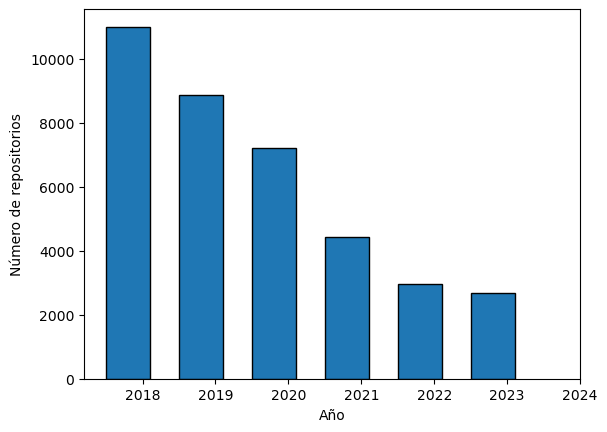

In [28]:
# Obtener los años mínimos y máximos de las fechas de creación
min_year = df_copy['createdAt'].dt.year.min()
max_year = df_copy['createdAt'].dt.year.max()

# Imprimir las fechas mínima y máxima de creación
print(f"Fecha de creación más antigua: {min_year}")
print(f"Fecha de creación más reciente: {max_year}")

# Agrupar y contar los repositorios por año de creación
repos_by_year = df_copy['createdAt'].dt.year.value_counts().sort_index()

print(repos_by_year)

# Estadísticas descriptivas sobre las fechas de creación
estadisticas_fechas = df_copy['createdAt'].describe()
print(estadisticas_fechas)

# Definir los bins de manera que comiencen en el primer año y terminen en el último
bins = range(min_year, max_year + 1)  # Se suma 2 para incluir el último año completo

# Crear el histograma con bins que empiezan y terminan en años enteros
df_copy['createdAt'].dt.year.hist(bins=bins, edgecolor='black', align='left', width=0.6)
#plt.title('Distribución de repositorios por año de creación')
plt.xlabel('Año')
plt.ylabel('Número de repositorios')
plt.grid(False)
plt.xticks(bins)  # Asegurar que el eje x solo muestre años enteros
plt.show()


Fecha de creación más antigua: 2018
Fecha de creación más reciente: 2024
createdAt
2018    10995
2019     8875
2020     7194
2021     4426
2022     2964
2023     2194
2024      472
Name: count, dtype: int64
count                                  37120
mean     2020-02-19 03:46:37.047333376+00:00
min                2018-01-01 00:20:19+00:00
25%      2018-10-29 16:24:22.750000128+00:00
50%         2019-10-25 04:31:29.500000+00:00
75%      2021-02-22 19:33:54.750000128+00:00
max                2024-08-29 19:52:32+00:00
Name: createdAt, dtype: object


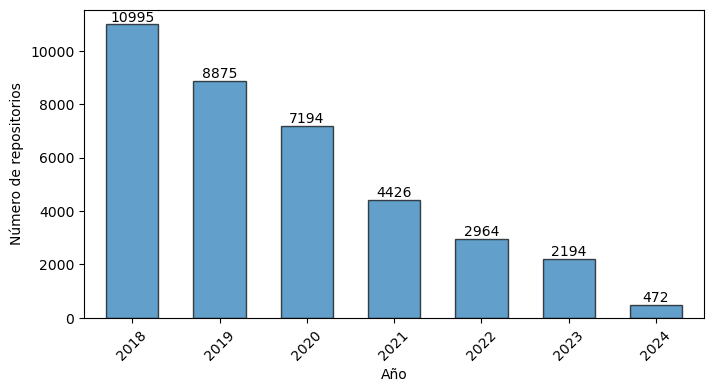

In [29]:
# Obtener los años mínimos y máximos de las fechas de creación
min_year = df_copy['createdAt'].dt.year.min()
max_year = df_copy['createdAt'].dt.year.max()

# Imprimir las fechas mínima y máxima de creación
print(f"Fecha de creación más antigua: {min_year}")
print(f"Fecha de creación más reciente: {max_year}")

# Agrupar y contar los repositorios por año de creación
repos_by_year = df_copy['createdAt'].dt.year.value_counts().sort_index()

print(repos_by_year)

# Estadísticas descriptivas sobre las fechas de creación
estadisticas_fechas = df_copy['createdAt'].describe()
print(estadisticas_fechas)

# Definir los bins de manera que comiencen en el primer año y terminen en el último
bins = range(min_year, max_year + 1)  # Se suma 1 para incluir el último año completo

# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
ax = repos_by_year.plot(kind='bar', edgecolor='black', width=0.6, alpha=0.7)

# Añadir los valores sobre cada barra
for index, value in enumerate(repos_by_year):
    ax.text(index, value, str(value), ha='center', va='bottom')

#plt.title('Distribución de repositorios por año de creación')
plt.xlabel('Año')
plt.ylabel('Número de repositorios')
plt.grid(False)
plt.xticks(rotation=45)  # Rotar etiquetas en el eje X si es necesario
plt.show()


### Lenguajes

In [30]:
df_copy['languages.nodes'].head()

0    [{'name': 'JavaScript'}, {'name': 'Shell'}, {'...
1    [{'name': 'Python'}, {'name': 'Jupyter Noteboo...
2     [{'name': 'JavaScript'}, {'name': 'TypeScript'}]
3                  [{'name': 'HTML'}, {'name': 'CSS'}]
4    [{'name': 'Go'}, {'name': 'HTML'}, {'name': 'S...
Name: languages.nodes, dtype: object

In [31]:
# Contar el número de lenguajes por repositorio
df_copy['language_count'] = df_copy['languages.nodes'].apply(lambda x: len(x))

# Mostrar los resultados
print(df_copy[['languages.nodes', 'language_count']].head())


                                     languages.nodes  language_count
0  [{'name': 'JavaScript'}, {'name': 'Shell'}, {'...               5
1  [{'name': 'Python'}, {'name': 'Jupyter Noteboo...               2
2   [{'name': 'JavaScript'}, {'name': 'TypeScript'}]               2
3                [{'name': 'HTML'}, {'name': 'CSS'}]               2
4  [{'name': 'Go'}, {'name': 'HTML'}, {'name': 'S...               4


count   37.120,00
mean         3,13
std          2,25
min          1,00
25%          1,00
50%          2,00
75%          4,00
max         10,00
Name: language_count, dtype: float64


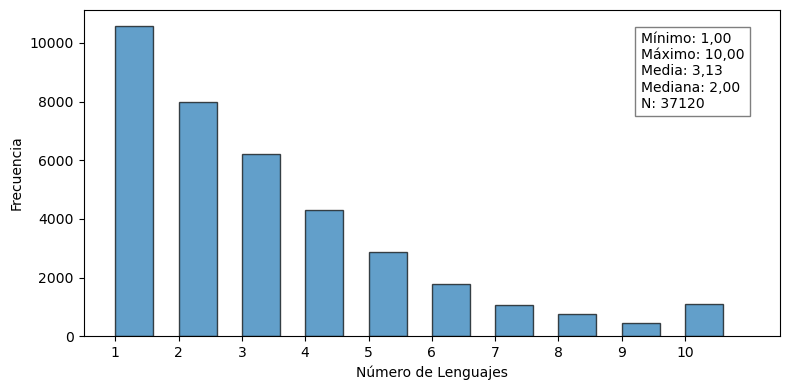

In [32]:
# Imprimir las estadísticas descriptivas del total de lenguajes por repositorio
stats = df_copy['language_count'].describe()
print(stats)

# Visualizamos el histograma
plt.figure(figsize=(8, 4))
plt.hist(df_copy['language_count'], bins=range(1, df_copy['language_count'].max() + 2), edgecolor='black', alpha=0.7, width=0.6)

# Añadir leyenda con estadísticas básicas en formato europeo y alineación a la izquierda
plt.text(0.8, 0.7,
         f'Mínimo: {stats["min"]:.2f}'.replace('.', ',') + '\n'
         f'Máximo: {stats["max"]:.2f}'.replace('.', ',') + '\n'
         f'Media: {stats["mean"]:.2f}'.replace('.', ',') + '\n'
         f'Mediana: {stats["50%"]:.2f}'.replace('.', ',') + '\n'
         f'N: {stats["count"]:.0f}',
         transform=plt.gca().transAxes, fontsize=10,
         bbox=dict(facecolor='white', alpha=0.5),
         horizontalalignment='left')  # Alinear el texto a la izquierda

#plt.title('Distribución del Número de Lenguajes por Repositorio')
plt.xlabel('Número de Lenguajes')
plt.ylabel('Frecuencia')
plt.xticks(range(1, df_copy['language_count'].max() + 1))
plt.grid(False)  # Desactivamos las líneas del grid
plt.tight_layout()  # Ajustamos el layout para evitar solapamientos
plt.show()


## Anomalías y outliers

In [33]:
# qué atributos numéricos contienen outliers graves
# Seleccionar solo las columnas numéricas
numeric_columns = df_copy.select_dtypes(include=['number'])

LIM=3

# Función para detectar valores extremos graves en una columna
def count_extremes(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - LIM * IQR
    upper_bound = Q3 + LIM * IQR
    # Contar los valores extremos graves
    return ((column < lower_bound) | (column > upper_bound)).sum()

# Total de registros (filas)
total_registros = len(df_copy)

# Crear una lista para almacenar resultados
results = []

# Aplicar la función a todas las columnas numéricas y recopilar resultados
for column in numeric_columns.columns:
    extremes_count = count_extremes(numeric_columns[column])
    percentage = (extremes_count / total_registros) * 100
    results.append({
        'Atributo': column,
        'Total Outliers': extremes_count,
        'Porcentaje sobre Total de Registros (%)': round(percentage, 2)
    })

# Convertir la lista de resultados a un DataFrame
outliers_table = pd.DataFrame(results)

# Mostrar la tabla de outliers
print(outliers_table)


                      Atributo  Total Outliers  \
0               stargazerCount            1311   
1                    forkCount            1640   
2                    diskUsage            3917   
3                 contributors            2317   
4            issues.totalCount            2567   
5             forks.totalCount            1623   
6   assignableUsers.totalCount            3363   
7       deployments.totalCount            7256   
8      environments.totalCount            7303   
9        milestones.totalCount            3646   
10         releases.totalCount            3805   
11     pullRequests.totalCount            3692   
12         watchers.totalCount            1148   
13              language_count               0   

    Porcentaje sobre Total de Registros (%)  
0                                      3,53  
1                                      4,42  
2                                     10,55  
3                                      6,24  
4                  

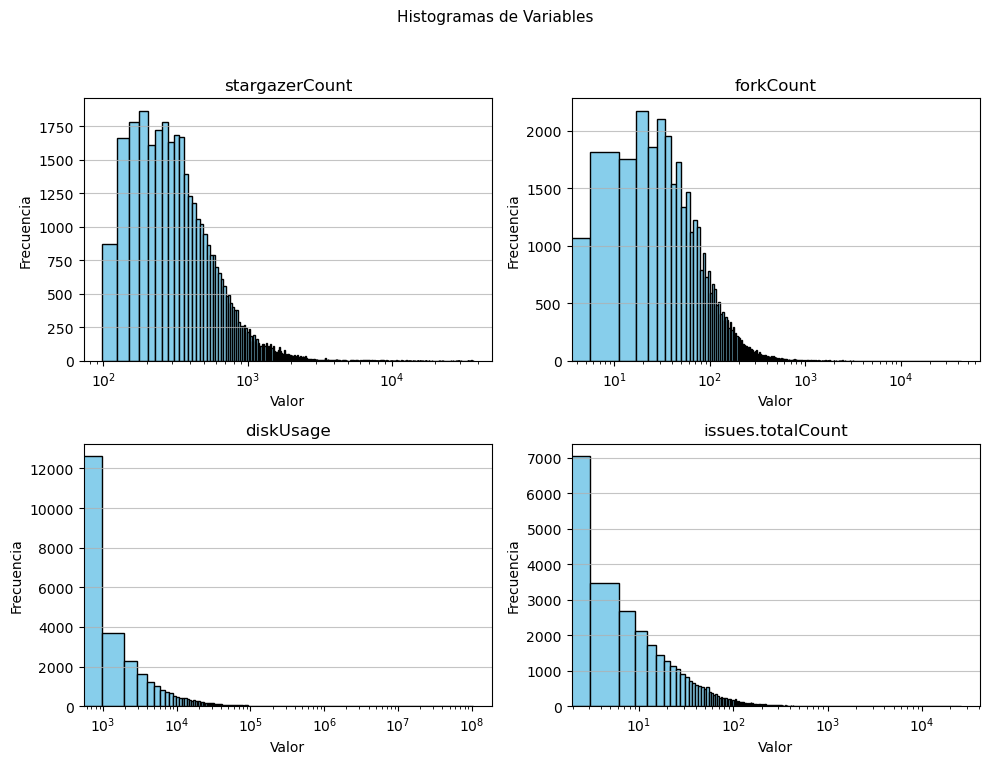

In [34]:
# Este código visualiza histogramas de las variables especificadas en un grid de 2x2.

# Lista de columnas a visualizar
columnas_a_visualizar = [
    'stargazerCount',
    'forkCount',
    'diskUsage',
    'issues.totalCount'
]

# Configurar el tamaño de la figura y la disposición de los subgráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Histogramas de Variables', fontsize=11)

# Iterar sobre las columnas y crear histogramas
for i, var in enumerate(columnas_a_visualizar):
    ax = axs[i // 2, i % 2]  # Determinar la posición en el grid
    
    # Calcular los límites de los bins dinámicamente
    bin_edges = np.histogram_bin_edges(df_copy[var], bins='auto')
    
    ax.hist(df_copy[var], bins=bin_edges, color='skyblue', edgecolor='black')
    ax.set_title(var)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')
    ax.set_xscale('log')  # Cambiar a escala logarítmica
    ax.grid(axis='y', alpha=0.75)

# Ajustar el layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Para evitar superposición con el título
plt.show()


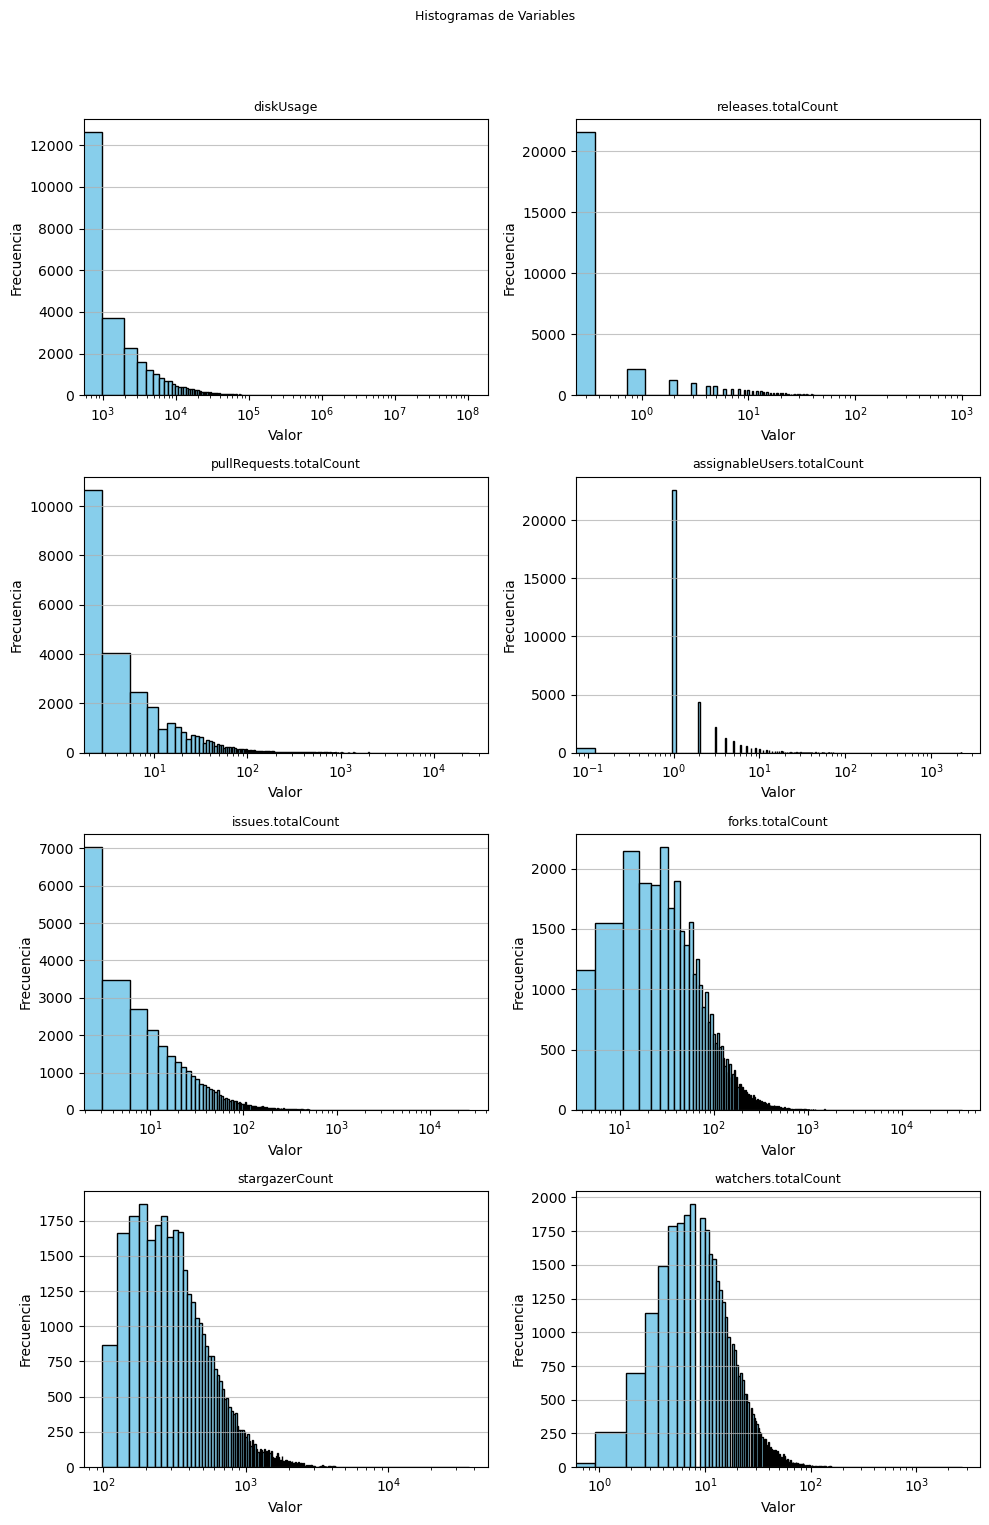

In [91]:
# Lista de columnas a visualizar
columnas_a_visualizar = [
    'diskUsage',
    'releases.totalCount',
    'pullRequests.totalCount',
    'assignableUsers.totalCount',
    'issues.totalCount',
    'forks.totalCount',
    'stargazerCount',
    'watchers.totalCount'
]

# Configurar el tamaño de la figura y la disposición de los subgráficos
n_cols = 2
n_rows = (len(columnas_a_visualizar) + n_cols - 1) // n_cols  # Calcular número de filas necesarias

fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 4))
fig.suptitle('Histogramas de Variables', fontsize=9)

# Iterar sobre las columnas y crear histogramas
for i, var in enumerate(columnas_a_visualizar):
    ax = axs[i // n_cols, i % n_cols]  # Determinar la posición en el grid
    
    # Calcular los límites de los bins dinámicamente
    bin_edges = np.histogram_bin_edges(df_copy[var], bins='auto')
    
    ax.hist(df_copy[var], bins=bin_edges, color='skyblue', edgecolor='black')
    ax.set_title(var, fontsize=9)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')
    ax.set_xscale('log')  # Cambiar a escala logarítmica
    ax.grid(axis='y', alpha=0.75)

# Ajustar el layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Para evitar superposición con el título
plt.show()


In [36]:
# las variables no visualiazadas en el antreio que presentan anomalias en los valores

columnas_a_visualizar = [
    'environments.totalCount',
    'deployments.totalCount',
    'milestones.totalCount',
    'contributors'
]


In [37]:
# ¿Cuántas veces aparece cada valor en cada variable

# Lista de columnas a visualizar
columnas_a_visualizar = [
    'environments.totalCount',
    'deployments.totalCount',
    'diskUsage',
    'releases.totalCount',
    'pullRequests.totalCount',
    'milestones.totalCount',
    'assignableUsers.totalCount',
    'issues.totalCount',
    'contributors',
    'forkCount',
    'forks.totalCount',
    'stargazerCount',
    'watchers.totalCount'
]

# Crear un diccionario para almacenar los conteos
value_counts_dict = {}

# Iterar sobre las columnas y contar los valores
for column in columnas_a_visualizar:
    value_counts = df_copy[column].value_counts().sort_index()  # Contar y ordenar
    value_counts_dict[column] = value_counts  # Guardar en el diccionario
    print(f"Conteo de valores en '{column}':\n{value_counts}\n")  # Mostrar en pantalla

# Crear un DataFrame a partir del diccionario
value_counts_df = pd.DataFrame(value_counts_dict)

# Guardar el DataFrame en un archivo CSV
# value_counts_df.to_csv('valor_counts.csv', index=True)


Conteo de valores en 'environments.totalCount':
environments.totalCount
0       29817
1        6039
2         739
3         265
4          73
5          30
6          43
7          24
8          14
9           9
10          5
11          7
12          6
13          3
14          4
15          2
16          2
18          4
20          1
23          2
25          2
27          1
30          1
32          1
34          1
38          1
39          1
44          1
61          1
64          1
68          1
72          1
79          1
80          1
88          1
126         1
128         1
136         1
147         1
161         1
178         1
202         1
285         1
304         1
321         1
383         1
1092        1
1709        1
3440        1
5262        1
Name: count, dtype: int64

Conteo de valores en 'deployments.totalCount':
deployments.totalCount
0         29864
1           322
2           218
3           180
4           147
          ...  
48299         1
66605         1
683

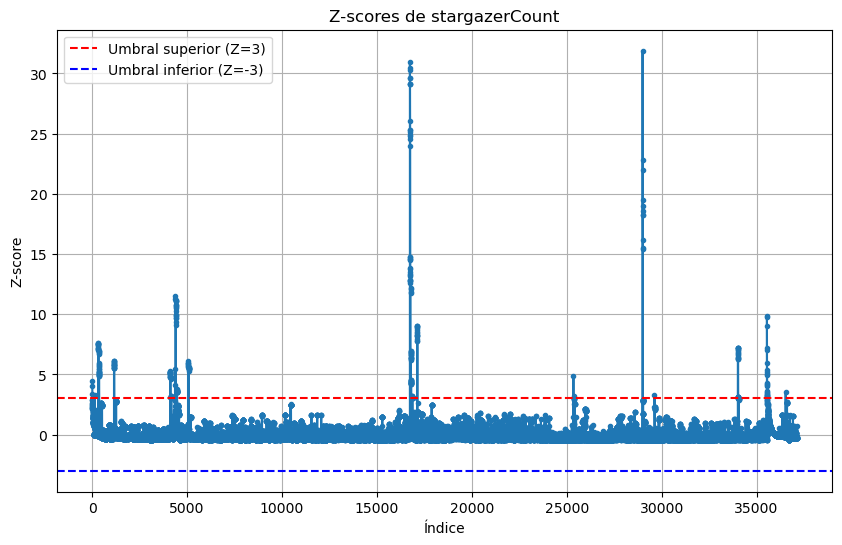

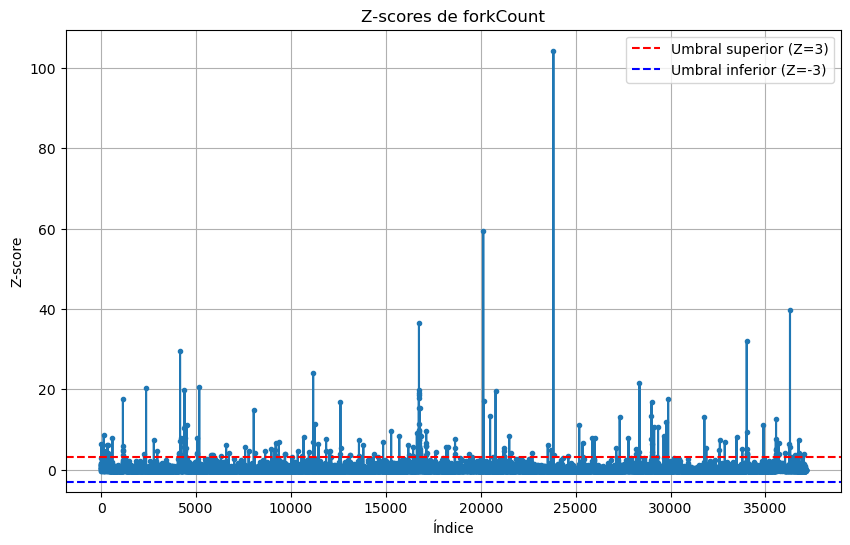

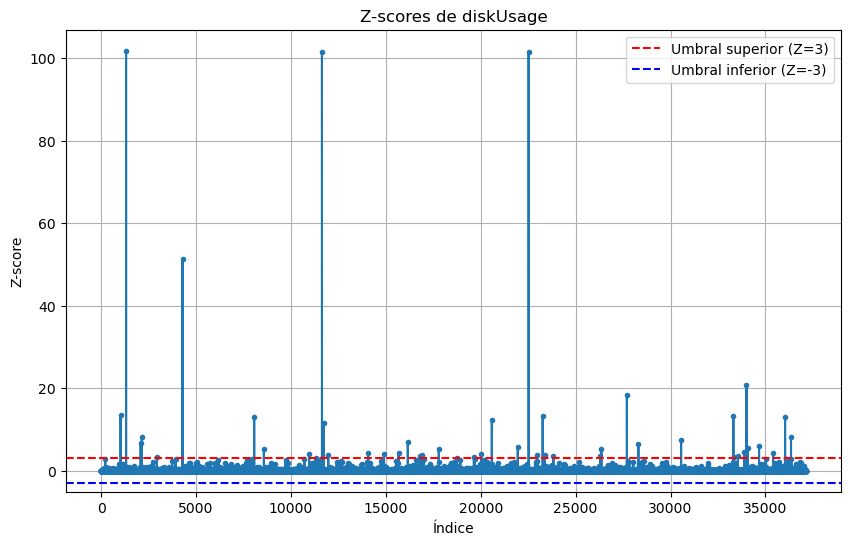

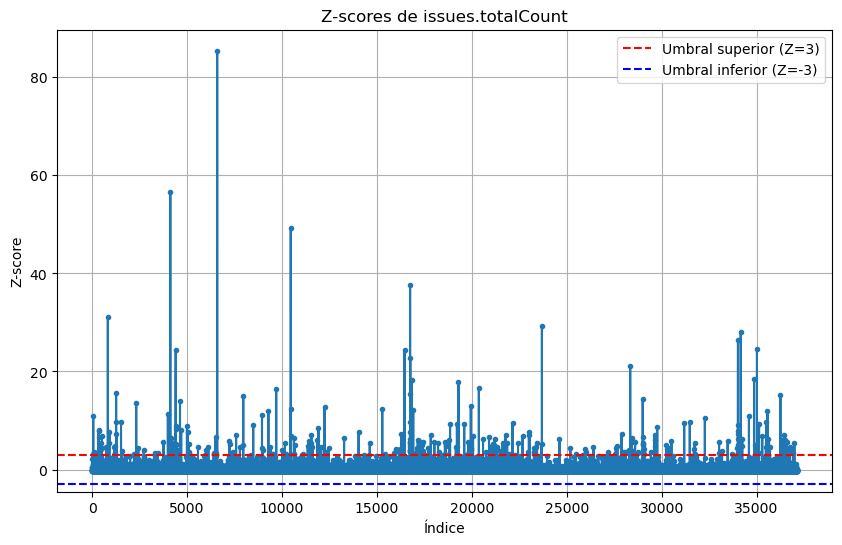

Variable: 'stargazerCount' - Outliers: 324 - Porcentaje: 0.87%
Variable: 'forkCount' - Outliers: 218 - Porcentaje: 0.59%
Variable: 'diskUsage' - Outliers: 44 - Porcentaje: 0.12%
Variable: 'issues.totalCount' - Outliers: 299 - Porcentaje: 0.81%


In [38]:


# Lista de columnas a analizar
columnas_a_analizar = [
    'stargazerCount',
    'forkCount',
    'diskUsage',
    'issues.totalCount'
]

# Inicializar un diccionario para almacenar resultados
resultados_outliers = {}

# Calcular Z-scores y detectar outliers
for var in columnas_a_analizar:
    # Calcular la media y la desviación estándar
    media = df_copy[var].mean()
    desviacion_estandar = df_copy[var].std()

    # Calcular Z-scores
    df_copy[f'z_score_{var}'] = (df_copy[var] - media) / desviacion_estandar

    # Contar outliers
    num_outliers = df_copy[abs(df_copy[f'z_score_{var}']) > 3].shape[0]
    total_observaciones = df_copy.shape[0]

    # Calcular el porcentaje de outliers
    porcentaje_outliers = (num_outliers / total_observaciones) * 100

    # Almacenar resultados
    resultados_outliers[var] = {
        'num_outliers': num_outliers,
        'porcentaje_outliers': porcentaje_outliers
    }

    # Visualizar Z-scores
    plt.figure(figsize=(10, 6))
    plt.plot(df_copy.index, df_copy[f'z_score_{var}'], marker='o', linestyle='-', markersize=3)
    plt.axhline(3, color='red', linestyle='--', label='Umbral superior (Z=3)')
    plt.axhline(-3, color='blue', linestyle='--', label='Umbral inferior (Z=-3)')
    plt.title(f'Z-scores de {var}')
    plt.xlabel('Índice')
    plt.ylabel('Z-score')
    plt.legend()
    plt.grid()
    plt.show()

# Imprimir resultados
for var, resultado in resultados_outliers.items():
    print(f"Variable: '{var}' - Outliers: {resultado['num_outliers']} - Porcentaje: {resultado['porcentaje_outliers']:.2f}%")


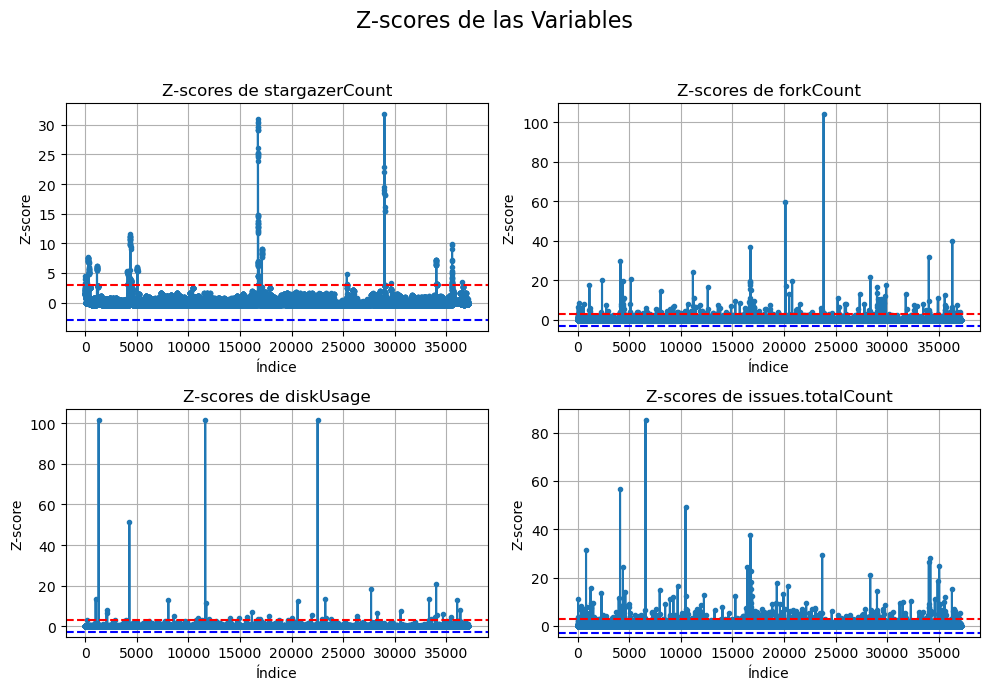

Variable: 'stargazerCount' - Outliers: 324 - Porcentaje: 0.87%
Variable: 'forkCount' - Outliers: 218 - Porcentaje: 0.59%
Variable: 'diskUsage' - Outliers: 44 - Porcentaje: 0.12%
Variable: 'issues.totalCount' - Outliers: 299 - Porcentaje: 0.81%


In [39]:
## visualización mejorada

# Lista de columnas a analizar
columnas_a_analizar = [
    'stargazerCount',
    'forkCount',
    'diskUsage',
    'issues.totalCount'
]

# Inicializar un diccionario para almacenar resultados
resultados_outliers = {}

# Crear una figura con una cuadrícula de 2x2
fig, axs = plt.subplots(2, 2, figsize=(10, 7))  # 2 filas y 2 columnas
fig.suptitle('Z-scores de las Variables', fontsize=16)  # Título general

# Calcular Z-scores y detectar outliers
for i, var in enumerate(columnas_a_analizar):
    # Calcular la media y la desviación estándar
    media = df_copy[var].mean()
    desviacion_estandar = df_copy[var].std()

    # Calcular Z-scores
    df_copy[f'z_score_{var}'] = (df_copy[var] - media) / desviacion_estandar

    # Contar outliers
    num_outliers = df_copy[abs(df_copy[f'z_score_{var}']) > 3].shape[0]
    total_observaciones = df_copy.shape[0]

    # Calcular el porcentaje de outliers
    porcentaje_outliers = (num_outliers / total_observaciones) * 100

    # Almacenar resultados
    resultados_outliers[var] = {
        'num_outliers': num_outliers,
        'porcentaje_outliers': porcentaje_outliers
    }

    # Visualizar Z-scores en el grid de subgráficas
    ax = axs[i // 2, i % 2]  # Determina la posición de la subgráfica
    ax.plot(df_copy.index, df_copy[f'z_score_{var}'], marker='o', linestyle='-', markersize=3)
    ax.axhline(3, color='red', linestyle='--', label='Umbral superior (Z=3)')
    ax.axhline(-3, color='blue', linestyle='--', label='Umbral inferior (Z=-3)')
    ax.set_title(f'Z-scores de {var}')
    ax.set_xlabel('Índice')
    ax.set_ylabel('Z-score')
    #ax.legend()
    ax.grid()

# Ajustar el layout para evitar superposición
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta el espacio del título general
plt.show()

# Imprimir resultados
for var, resultado in resultados_outliers.items():
    print(f"Variable: '{var}' - Outliers: {resultado['num_outliers']} - Porcentaje: {resultado['porcentaje_outliers']:.2f}%")


In [40]:
# Este código compara los métodos Z-score, IQR, Z-score robusto y Isolation Forest para identificar outliers en un DataFrame existente df_copy.

# Lista de columnas a analizar
columnas_a_analizar = [
    'stargazerCount',
    'forkCount',
    'diskUsage',
    'issues.totalCount'
]

# Inicializar un diccionario para almacenar resultados
resultados_outliers = {
    'Variable': [],
    'Método': [],
    'Núm. Outliers': [],
    '(%) outliers': []
}

LIMIQR = 3  # Limite para el método IQR

# Importar Isolation Forest
from sklearn.ensemble import IsolationForest

# Calcular Z-scores y detectar outliers
for var in columnas_a_analizar:
    # Calcular Z-scores
    media = df_copy[var].mean()
    desviacion_estandar = df_copy[var].std()
    z_scores = (df_copy[var] - media) / desviacion_estandar
    num_outliers_z = df_copy[abs(z_scores) > 3].shape[0]
    porcentaje_outliers_z = (num_outliers_z / df_copy.shape[0]) * 100

    # Almacenar resultados de Z-scores
    resultados_outliers['Variable'].append(var)
    resultados_outliers['Método'].append('Z-score')
    resultados_outliers['Núm. Outliers'].append(num_outliers_z)
    resultados_outliers['(%) outliers'].append(porcentaje_outliers_z)

    # Calcular IQR para detectar outliers
    Q1 = df_copy[var].quantile(0.25)
    Q3 = df_copy[var].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - LIMIQR * IQR
    limite_superior = Q3 + LIMIQR * IQR
    num_outliers_iqr = df_copy[(df_copy[var] < limite_inferior) | (df_copy[var] > limite_superior)].shape[0]
    porcentaje_outliers_iqr = (num_outliers_iqr / df_copy.shape[0]) * 100

    # Almacenar resultados de IQR
    resultados_outliers['Variable'].append(var)
    resultados_outliers['Método'].append('IQR')
    resultados_outliers['Núm. Outliers'].append(num_outliers_iqr)
    resultados_outliers['(%) outliers'].append(porcentaje_outliers_iqr)

    # Calcular Z-score robusto (mediana y IQR)
    mediana = df_copy[var].median()
    rango_intercuartilico = Q3 - Q1
    z_scores_robusto = (df_copy[var] - mediana) / rango_intercuartilico if rango_intercuartilico != 0 else 0
    num_outliers_robusto = df_copy[abs(z_scores_robusto) > 3].shape[0]
    porcentaje_outliers_robusto = (num_outliers_robusto / df_copy.shape[0]) * 100

    # Almacenar resultados de Z-score robusto
    resultados_outliers['Variable'].append(var)
    resultados_outliers['Método'].append('Z-score robusto')
    resultados_outliers['Núm. Outliers'].append(num_outliers_robusto)
    resultados_outliers['(%) outliers'].append(porcentaje_outliers_robusto)

    # Crear un DataFrame auxiliar para Isolation Forest
    df_aux = df_copy[[var]].copy()

    # Calcular outliers usando Isolation Forest
    isolation_forest = IsolationForest(contamination=0.05, random_state=42)  # Ajustar contaminación según se necesite
    df_aux['outlier'] = isolation_forest.fit_predict(df_aux)  # Ajustar modelo
    num_outliers_if = (df_aux['outlier'] == -1).sum()  # Contar outliers (marcados como -1)
    porcentaje_outliers_if = (num_outliers_if / df_aux.shape[0]) * 100

    # Almacenar resultados de Isolation Forest
    resultados_outliers['Variable'].append(var)
    resultados_outliers['Método'].append('Isolation Forest')
    resultados_outliers['Núm. Outliers'].append(num_outliers_if)
    resultados_outliers['(%) outliers'].append(porcentaje_outliers_if)

# Crear un DataFrame para mostrar resultados
resultados_df = pd.DataFrame(resultados_outliers)

# Mostrar la tabla comparativa
display(resultados_df)

# Limpiar el DataFrame auxiliar (opcional, no necesario en este contexto ya que es local)
del df_aux


,Variable,Método,Núm. Outliers,(%) outliers
0,stargazerCount,Z-score,324,"0,87"
1,stargazerCount,IQR,1311,"3,53"
2,stargazerCount,Z-score robusto,1829,"4,93"
3,stargazerCount,Isolation Forest,1836,"4,95"
4,forkCount,Z-score,218,"0,59"
5,forkCount,IQR,1640,"4,42"
6,forkCount,Z-score robusto,2132,"5,74"
7,forkCount,Isolation Forest,1851,"4,99"
8,diskUsage,Z-score,44,"0,12"
9,diskUsage,IQR,3917,"10,55"


In [41]:
resultados_df

,Variable,Método,Núm. Outliers,(%) outliers
0,stargazerCount,Z-score,324,"0,87"
1,stargazerCount,IQR,1311,"3,53"
2,stargazerCount,Z-score robusto,1829,"4,93"
3,stargazerCount,Isolation Forest,1836,"4,95"
4,forkCount,Z-score,218,"0,59"
5,forkCount,IQR,1640,"4,42"
6,forkCount,Z-score robusto,2132,"5,74"
7,forkCount,Isolation Forest,1851,"4,99"
8,diskUsage,Z-score,44,"0,12"
9,diskUsage,IQR,3917,"10,55"


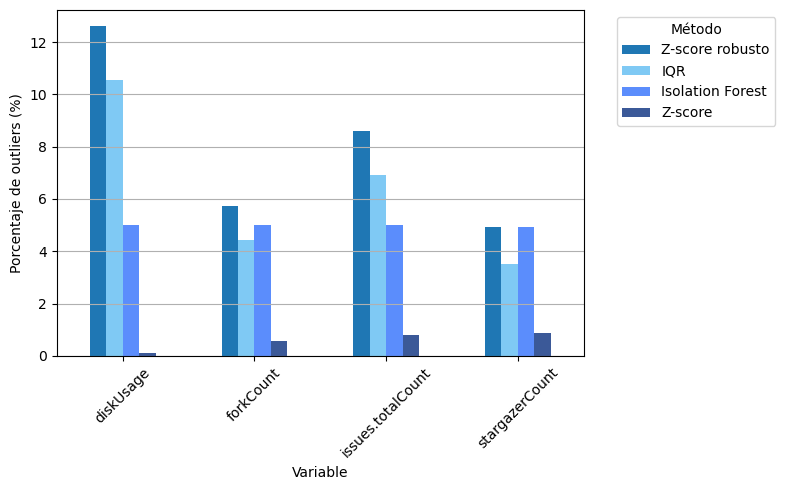

In [42]:
# Este código genera una gráfica comparativa de los resultados de outliers obtenidos con diferentes métodos,
# ordenando las barras de cada variable según el orden especificado.

import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame para visualizar los resultados de manera más fácil
resultados_visualizar = resultados_df.pivot(index='Variable', columns='Método', values='Núm. Outliers')

# Calcular el total de observaciones para obtener porcentajes
total_observaciones = len(df_copy)

# Convertir el número de outliers a porcentajes
resultados_visualizar = (resultados_visualizar / total_observaciones) * 100

# Definir el orden de los métodos
orden_metodos = ['Z-score robusto', 'IQR', 'Isolation Forest', 'Z-score']

# Reorganizar las columnas del DataFrame según el orden especificado
resultados_visualizar = resultados_visualizar[orden_metodos]

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 5))

# Crear un gráfico de barras con colores estándar
colores = ['#1f77b4', '#7fc9f4', '#5b8dfc', '#3b5998']  # Paleta de azules
resultados_visualizar.plot(kind='bar', ax=plt.gca(), color=colores)

# Personalizar la gráfica
#plt.title('Comparación de outliers por método')
plt.xlabel('Variable')
plt.ylabel('Porcentaje de outliers (%)')
plt.xticks(rotation=45)
plt.legend(title='Método', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


In [43]:
df_copy.describe()

,stargazerCount,forkCount,diskUsage,contributors,issues.totalCount,forks.totalCount,assignableUsers.totalCount,deployments.totalCount,environments.totalCount,milestones.totalCount,releases.totalCount,pullRequests.totalCount,watchers.totalCount,language_count,z_score_stargazerCount,z_score_forkCount,z_score_diskUsage,z_score_issues.totalCount
count,"37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00","37.120,00"
mean,"641,05","122,97","54.013,99","9,35","72,76","118,59","12,56","70,11","0,66","0,68","10,18","100,17","20,18","3,13","-0,00","-0,00","0,00","-0,00"
std,"1.138,44","412,44","1.031.953,50","16,72","305,62","397,63","127,56","1.780,88","34,54","4,37","41,43","458,81","40,06","2,25","1,00","1,00","1,00","1,00"
min,"98,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","1,00","-0,48","-0,30","-0,05","-0,24"
25%,"252,00","29,00","475,00","1,00","5,00","28,00","1,00","0,00","0,00","0,00","0,00","2,00","8,00","1,00","-0,34","-0,23","-0,05","-0,22"
50%,"406,00","61,00","2.931,00","3,00","19,00","59,00","1,00","0,00","0,00","0,00","0,00","11,00","13,00","2,00","-0,21","-0,15","-0,05","-0,18"
75%,"691,00","122,00","16.806,00","9,00","56,00","118,00","3,00","0,00","0,00","0,00","6,00","48,00","23,00","4,00","0,04","-0,00","-0,04","-0,05"
max,"36.939,00","43.148,00","105.078.627,00","100,00","26.175,00","42.880,00","2.267,00","287.890,00","5.262,00","229,00","1.000,00","23.809,00","2.675,00","10,00","31,88","104,32","101,77","85,41"


In [44]:
(df_copy['stargazerCount'] > 0).count()

37120

### Transformación

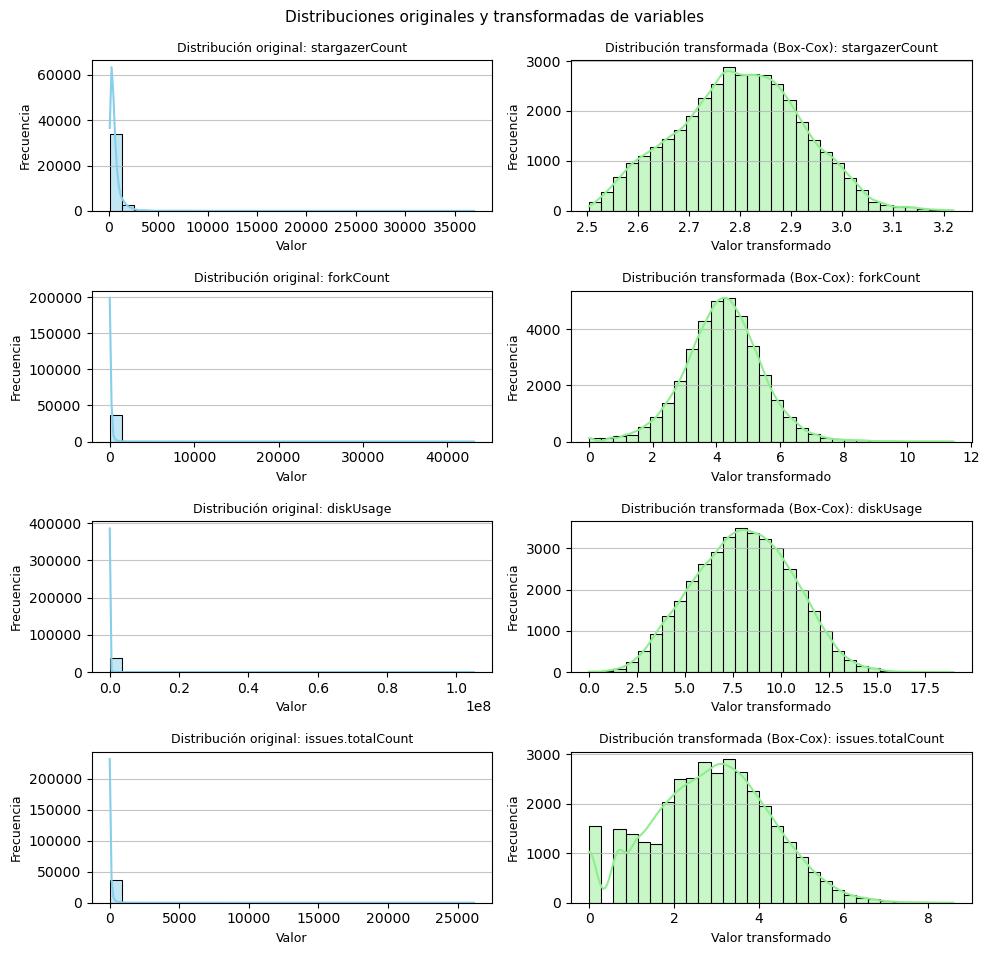

In [47]:
# Este código visualiza las distribuciones originales y transformadas de las variables especificadas.

from scipy.stats import boxcox


# Lista de columnas a analizar
columnas_a_analizar = [
    'stargazerCount',
    'forkCount',
    'diskUsage',
    'issues.totalCount'
]


# Crear un diccionario para almacenar los resultados de Box-Cox
resultados_boxcox = {}

# Calcular la transformación Box-Cox
for var in columnas_a_analizar:
    # Filtrar los datos para incluir solo valores positivos y no nulos
    positivos = df_copy[var].dropna()[df_copy[var] > 0]

    # Verificar que hay suficientes datos para aplicar Box-Cox
    if len(positivos) > 0:
        # Aplicar Box-Cox (se debe aplicar sobre un array, no sobre una serie de pandas)
        transformed_data, lambda_value = boxcox(positivos.to_numpy())
        resultados_boxcox[var] = {
            'transformed_data': transformed_data,
            'lambda': lambda_value
        }
    else:
        print(f"La variable {var} no tiene valores positivos, se omite la transformación.")

# Asegurarse de que los datos no tengan valores nulos en las columnas a analizar
df_copy = df_copy.dropna(subset=columnas_a_analizar)

# Configurar el tamaño de la figura y la disposición de los subgráficos
fig, axs = plt.subplots(min(len(columnas_a_analizar), 4), 2, figsize=(10, 10))
fig.suptitle('Distribuciones originales y transformadas de variables', fontsize=11)

# Iterar sobre las columnas a analizar
for i, var in enumerate(columnas_a_analizar):
    # Gráfico de la distribución original
    ax_original = axs[i, 0]  # Columna izquierda para originales
    sns.histplot(df_copy[var], bins=30, kde=True, ax=ax_original, color='skyblue', edgecolor='black')
    ax_original.set_title(f'Distribución original: {var}', fontsize=9)
    ax_original.set_xlabel('Valor', fontsize=9)
    ax_original.set_ylabel('Frecuencia', fontsize=9)
    ax_original.grid(axis='y', alpha=0.75)

    # Gráfico de la distribución transformada
    ax_transformed = axs[i, 1]  # Columna derecha para transformadas
    if var in resultados_boxcox:
        sns.histplot(resultados_boxcox[var]['transformed_data'], bins=30, kde=True, ax=ax_transformed, color='lightgreen', edgecolor='black')
        ax_transformed.set_title(f'Distribución transformada (Box-Cox): {var}', fontsize=9)
        ax_transformed.set_xlabel('Valor transformado', fontsize=9)
        ax_transformed.set_ylabel('Frecuencia', fontsize=9)
    else:
        ax_transformed.set_title(f'Sin transformación: {var}', fontsize=9)
        ax_transformed.set_ylabel('Frecuencia', fontsize=9)

    ax_transformed.grid(axis='y', alpha=0.75)

# Ajustar el layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Para evitar superposición con el título
plt.subplots_adjust(top=0.93)
plt.show()


In [ ]:
# qué repos son los outliers


columnas_a_analizar = [
    'stargazerCount',
    'forkCount',
    'diskUsage',
    'issues.totalCount'
]

# Inicializar un diccionario para almacenar resultados
resultados_outliers = {}

# Calcular Z-scores y detectar outliers
for var in columnas_a_analizar:
    # Calcular la media y la desviación estándar
    media = df_copy[var].mean()
    desviacion_estandar = df_copy[var].std()

    # Calcular Z-scores
    z_scores = (df_copy[var] - media) / desviacion_estandar
    
    # Detectar outliers
    outliers = df_copy[abs(z_scores) > 3]

    # Contar outliers
    num_outliers = outliers.shape[0]  # Número de outliers
    total_observaciones = df_copy.shape[0]  # Total de observaciones

    # Calcular el porcentaje de outliers
    porcentaje_outliers = (num_outliers / total_observaciones) * 100 if total_observaciones > 0 else 0

    # Almacenar resultados de conteo de outliers
    resultados_outliers[var] = {
        'num_outliers': num_outliers,
        'porcentaje_outliers': porcentaje_outliers,
        'reponames': outliers['reponame'].tolist()  # Listar los reponames de los outliers
    }

# Imprimir resultados
for var, resultado in resultados_outliers.items():
    print(f"Variable: '{var}' - Outliers: {resultado['num_outliers']} - Porcentaje: {resultado['porcentaje_outliers']:.2f}%")
    print(f"Repositorios con outliers en '{var}': {resultado['reponames']}")



### Detalles de algunas variables

In [ ]:
# diskUsage en escala logarítmica para visualizar algo:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Paso 1: Asegurarnos de que 'diskUsage' está en formato numérico (eliminando comas y puntos si es necesario)
df_copy['diskUsage'] = pd.to_numeric(df_copy['diskUsage'].replace({',': '', '.': ''}, regex=True), errors='coerce')

# Paso 2: Agrupar los repositorios por uso de disco y contar cuántos repositorios caen en cada valor
disk_usage_counts = df_copy['diskUsage'].value_counts().reset_index()
disk_usage_counts.columns = ['diskUsage', 'num_repos']

# Paso 3: Crear gráfico de dispersión con escala logarítmica en el eje X
plt.figure(figsize=(8, 5))
sns.scatterplot(x='diskUsage', y='num_repos', data=disk_usage_counts)

# Cambiar el eje X a una escala logarítmica
plt.xscale('log')

# Añadir líneas para la media y la mediana
# Calcular la media y la mediana como antes
#mean_disk_usage = df_copy['diskUsage'].mean()
#median_disk_usage = df_copy['diskUsage'].median()
#plt.axvline(mean_disk_usage, color='red', linestyle='--', label=f'Media: {mean_disk_usage:.2f}')
#plt.axvline(median_disk_usage, color='blue', linestyle='-', label=f'Mediana: {median_disk_usage:.2f}')


# Añadir títulos y etiquetas
plt.title('Repositorios por Uso de Disco (diskUsage) [Escala Logarítmica]')
plt.xlabel('diskUsage [Escala Logarítmica]')
plt.ylabel('Frecuencia de Repositorios')
plt.show()


In [ ]:
# limitando outliers
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Paso 1: Asegurarnos de que 'diskUsage' está en formato numérico (eliminando comas y puntos si es necesario)
df_copy['diskUsage'] = pd.to_numeric(df_copy['diskUsage'].replace({',': '', '.': ''}, regex=True), errors='coerce')

# Paso 2: Calcular Q1, Q3 e IQR
Q1 = df_copy['diskUsage'].quantile(0.25)
Q3 = df_copy['diskUsage'].quantile(0.75)
IQR = Q3 - Q1

# Calcular el límite superior para truncar
LIM = 3
upper_limit = Q3 + (LIM * IQR)

# Paso 3: Filtrar el DataFrame para incluir solo los valores de diskUsage por debajo del límite superior
df_filtered = df_copy[df_copy['diskUsage'] <= upper_limit]

# Paso 4: Agrupar los repositorios por uso de disco y contar cuántos repositorios caen en cada valor
disk_usage_counts = df_filtered['diskUsage'].value_counts().reset_index()
disk_usage_counts.columns = ['diskUsage', 'num_repos']

# Paso 5: Crear gráfico de dispersión con escala logarítmica en el eje X
plt.figure(figsize=(8, 4))
sns.scatterplot(x='diskUsage', y='num_repos', data=disk_usage_counts)

# Cambiar el eje X a una escala logarítmica
plt.xscale('log')

# Añadir títulos y etiquetas
#plt.title('Repositorios por Uso de Disco (diskUsage) [Escala Logarítmica]')
plt.xlabel('diskUsage [Escala Logarítmica]')
plt.ylabel('Frecuencia de Repositorios')
plt.show()


In [ ]:
# diskUsage vs contributors
# estadísticas truncadas a Q3 + (LIM * IQR)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que 'diskUsage' y 'contributors' están en formato numérico
df_copy['diskUsage'] = pd.to_numeric(df_copy['diskUsage'].replace({',': '', '.': ''}, regex=True), errors='coerce')
df_copy['contributors'] = pd.to_numeric(df_copy['contributors'], errors='coerce')

# Paso 1: Calcular cuartiles y IQR
Q1 = df_copy['diskUsage'].quantile(0.25)
Q3 = df_copy['diskUsage'].quantile(0.75)
IQR = Q3 - Q1

# Definir el límite para los outliers
LIM = 3
upper_bound = Q3 + (LIM * IQR)

# Paso 2: Filtrar outliers
df_filtered = df_copy[df_copy['diskUsage'] <= upper_bound]

# Paso 3: Calcular la correlación
correlation_filtered = df_filtered[['diskUsage', 'contributors']].corr().iloc[0, 1]
print(f'Coeficiente de correlación (sin outliers) entre diskUsage y contributors: {correlation_filtered:.2f}')

# Paso 4: Calcular media y mediana de contributors
mean_contributors = df_filtered['contributors'].mean()
median_contributors = df_filtered['contributors'].median()

# Paso 5: Graficar scatter plot filtrado
plt.figure(figsize=(9, 5))
sns.scatterplot(x='diskUsage', y='contributors', data=df_filtered, alpha=0.6)

# Añadir líneas para la media y la mediana
plt.axhline(mean_contributors, color='red', linestyle='--', label=f'Media contributors: {mean_contributors:.2f}')
plt.axhline(median_contributors, color='blue', linestyle='-', label=f'Mediana contributors: {median_contributors:.2f}')

# Títulos y etiquetas
#plt.title('Scatter Plot de diskUsage vs Contributors (sin Outliers)')
plt.xlabel('diskUsage [escala logarítmica]')
plt.ylabel('Contributors')
plt.xscale('log')  # Escala logarítmica para el eje X si es necesario
plt.grid()
# Ajustar tamaño de fuente en la leyenda
plt.legend(fontsize=5)
plt.legend()  # Mostrar leyenda
plt.show()



In [ ]:
# diskUsage vs contributors, sin outliers en ambas variables

# Paso 1: Calcular cuartiles e IQR para diskUsage
Q1_diskUsage = df_copy['diskUsage'].quantile(0.25)
Q3_diskUsage = df_copy['diskUsage'].quantile(0.75)
IQR_diskUsage = Q3_diskUsage - Q1_diskUsage

# Paso 2: Calcular cuartiles e IQR para contributors
Q1_contributors = df_copy['contributors'].quantile(0.25)
Q3_contributors = df_copy['contributors'].quantile(0.75)
IQR_contributors = Q3_contributors - Q1_contributors

# Definir el límite para los outliers
LIM = 1.
upper_bound_diskUsage = Q3_diskUsage + (LIM * IQR_diskUsage)
upper_bound_contributors = Q3_contributors + (LIM * IQR_contributors)

# Paso 3: Filtrar outliers para ambas variables
df_filtered = df_copy[(df_copy['diskUsage'] <= upper_bound_diskUsage) & 
                      (df_copy['contributors'] <= upper_bound_contributors)]

# Paso 4: Calcular la correlación
correlation_filtered = df_filtered[['diskUsage', 'contributors']].corr().iloc[0, 1]
print(f'Coeficiente de correlación (sin outliers) entre diskUsage y contributors: {correlation_filtered:.2f}')

# Paso 5: Graficar scatter plot filtrado
plt.figure(figsize=(10, 6))
sns.scatterplot(x='diskUsage', y='contributors', data=df_filtered, alpha=0.6)
plt.title('Scatter Plot de diskUsage vs Contributors (sin Outliers)')
plt.xlabel('diskUsage')
plt.ylabel('Contributors')
plt.xscale('log')  # Escala logarítmica para el eje X si es necesario
plt.grid()
plt.show()



In [ ]:
# detalle de contributors

# Paso 1: Visualizar la distribución de contributors con un histograma
plt.figure(figsize=(8, 4))
sns.histplot(df_copy['contributors'], bins=50, kde=True)  # Añadir 'kde=True' para la estimación de densidad
#plt.title('Distribución de Contributors con KDE')
plt.xlabel('Contributors')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()


In [ ]:
# Imprimir la moda para cada variable dentro del rango limitado
for var in variables:
    # Filtrar valores por encima de Q3 y por debajo del percentil 90
    above_Q3 = df_copy[df_copy[var] > df_copy[var].quantile(0.75)]
    upper_limit = above_Q3[var].quantile(0.90) if not above_Q3.empty else Q3
    limited_values = above_Q3[(above_Q3[var] <= upper_limit)]
    
    mode_value = limited_values[var].mode()[0] if not limited_values[var].mode().empty else None
    print(f'Moda de {var} dentro del rango limitado: {mode_value}')

### Correlación numéricas

Valores de correlación ordenados de mayor a menor (sin duplicados):
                    Variable 1               Variable 2  Correlación
61           issues.totalCount  pullRequests.totalCount         0,51
32                contributors  pullRequests.totalCount         0,49
34                contributors        issues.totalCount         0,41
23       milestones.totalCount  pullRequests.totalCount         0,37
25           issues.totalCount    milestones.totalCount         0,36
50     pullRequests.totalCount      releases.totalCount         0,36
31                contributors      releases.totalCount         0,32
20                contributors    milestones.totalCount         0,28
52           issues.totalCount      releases.totalCount         0,27
22       milestones.totalCount      releases.totalCount         0,20
35                contributors         forks.totalCount         0,17
62            forks.totalCount  pullRequests.totalCount         0,16
12      deployments.totalCount     

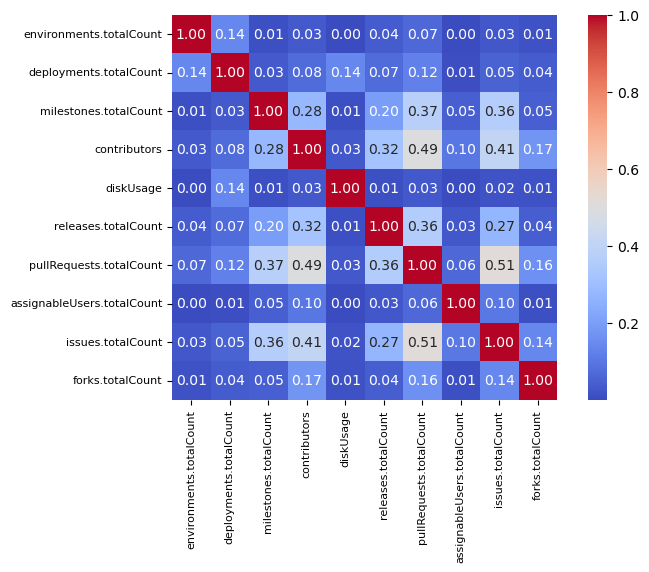

Resultados significativos:
                 Variable 1                  Variable 2  p-value
56  pullRequests.totalCount       milestones.totalCount     0,00
29             contributors       milestones.totalCount     0,00
34             contributors           issues.totalCount     0,00
25    milestones.totalCount           issues.totalCount     0,00
47      releases.totalCount       milestones.totalCount     0,00
..                      ...                         ...      ...
88         forks.totalCount  assignableUsers.totalCount     0,02
18    milestones.totalCount     environments.totalCount     0,02
1   environments.totalCount       milestones.totalCount     0,02
40                diskUsage         releases.totalCount     0,04
49      releases.totalCount                   diskUsage     0,04

[80 rows x 3 columns]

Resultados no significativos:
                    Variable 1                  Variable 2  p-value
21       milestones.totalCount                   diskUsage     0,05
38 

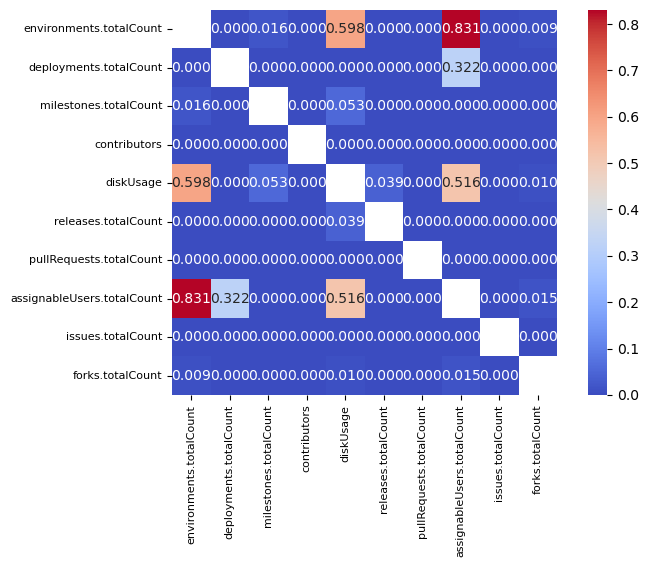

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Lista de variables a analizar
variables = [
    'environments.totalCount',
    'deployments.totalCount',
    'milestones.totalCount',
    'contributors',
    'diskUsage',
    'releases.totalCount',
    'pullRequests.totalCount',
    'assignableUsers.totalCount',
    'issues.totalCount',
    'forks.totalCount'
]

# Filtrar el DataFrame para incluir solo las variables seleccionadas
df_filtered = df_copy[variables]

# Paso 1: Calcular la matriz de correlación
correlation_matrix = df_filtered.corr()

# imprimir resultados
import pandas as pd

# Paso 1: Obtener la matriz de correlación como un DataFrame de pares (sin duplicados)
correlation_pairs = correlation_matrix.unstack()

# Paso 2: Filtrar valores duplicados y autocorrelaciones (diagonal)
correlation_pairs = correlation_pairs[correlation_pairs.index.get_level_values(0) != correlation_pairs.index.get_level_values(1)]

# Paso 3: Crear un DataFrame con los pares ordenados alfabéticamente para eliminar duplicados
correlation_pairs_df = pd.DataFrame(correlation_pairs).reset_index()
correlation_pairs_df.columns = ['Variable 1', 'Variable 2', 'Correlación']

# Paso 4: Ordenar las columnas de 'Variable 1' y 'Variable 2' para eliminar duplicados tipo A-B y B-A
correlation_pairs_df[['Variable 1', 'Variable 2']] = np.sort(correlation_pairs_df[['Variable 1', 'Variable 2']], axis=1)

# Paso 5: Eliminar duplicados (combinaciones tipo A-B y B-A)
correlation_pairs_df = correlation_pairs_df.drop_duplicates(subset=['Variable 1', 'Variable 2'])

# Paso 6: Ordenar los pares por valor de correlación, de mayor a menor
correlation_sorted_df = correlation_pairs_df.sort_values(by='Correlación', ascending=False)

# Paso 7: Mostrar los pares ordenados
print("Valores de correlación ordenados de mayor a menor (sin duplicados):")
print(correlation_sorted_df)




# Visualizar la matriz de correlación
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
#plt.title('Matriz de correlación entre variables numéricas', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# Paso 2: Prueba de significancia para cada par de variables
results = []
p_values_matrix = pd.DataFrame(index=variables, columns=variables)

for i in range(len(variables)):
    for j in range(len(variables)):
        if i != j:
            _, p = stats.pearsonr(df_filtered[variables[i]], df_filtered[variables[j]])
            results.append({
                'Variable 1': variables[i],
                'Variable 2': variables[j],
                'p-value': p,
                'Significativa': p < 0.05
            })
            p_values_matrix.iloc[i, j] = p
        else:
            p_values_matrix.iloc[i, j] = None

# Convertir resultados a DataFrame
results_df = pd.DataFrame(results)

# Filtrar y ordenar resultados
significant_results = results_df[results_df['Significativa']].sort_values(by='p-value')
non_significant_results = results_df[~results_df['Significativa']].sort_values(by='p-value')

# Mostrar resultados en formato de tabla
print("Resultados significativos:")
print(significant_results[['Variable 1', 'Variable 2', 'p-value']])
print("\nResultados no significativos:")
print(non_significant_results[['Variable 1', 'Variable 2', 'p-value']])

# Visualizar la matriz de p-values
plt.figure(figsize=(8, 5))
sns.heatmap(p_values_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".3f", square=True)
#plt.title('Matriz de p-values de la correlación entre variables numéricas', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()


In [52]:
# listamos los pares significantes según matriz y pearson
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Lista de variables a analizar
variables = [
    'environments.totalCount',
    'deployments.totalCount',
    'milestones.totalCount',
    'contributors',
    'diskUsage',
    'releases.totalCount',
    'pullRequests.totalCount',
    'assignableUsers.totalCount',
    'issues.totalCount',
    'forks.totalCount'
]

# Filtrar el DataFrame para incluir solo las variables seleccionadas
df_filtered = df_copy[variables]

# Paso 1: Calcular la matriz de correlación
correlation_matrix = df_filtered.corr()

# Paso 2: Prueba de significancia para cada par de variables
p_values_matrix = pd.DataFrame(index=variables, columns=variables)

for i in range(len(variables)):
    for j in range(len(variables)):
        if i != j:
            _, p = stats.pearsonr(df_filtered[variables[i]], df_filtered[variables[j]])
            p_values_matrix.iloc[i, j] = p
        else:
            p_values_matrix.iloc[i, j] = None

# Paso 3: Filtrar los pares con correlaciones significativas
threshold_corr = 0.3  # Puedes ajustar este umbral de correlación
significant_pairs = []

for i in range(len(variables)):
    for j in range(i+1, len(variables)):  # Solo recorremos la mitad superior (evitamos duplicados)
        corr_value = correlation_matrix.iloc[i, j]
        p_value = p_values_matrix.iloc[i, j]

        if abs(corr_value) >= threshold_corr and p_value < 0.05:
            significant_pairs.append({
                'Variable 1': variables[i],
                'Variable 2': variables[j],
                'Correlación': corr_value,
                'p-value': p_value
            })

# Convertir a DataFrame para visualizar mejor
significant_pairs_df = pd.DataFrame(significant_pairs)

# Ordenar por la magnitud de la correlación
significant_pairs_df = significant_pairs_df.sort_values(by='Correlación', ascending=False)

# Mostrar los pares de variables con correlaciones significativas
print("Pares con correlación significativa y p-value < 0.05:")
print(significant_pairs_df)




Pares con correlación significativa y p-value < 0.05:
                Variable 1               Variable 2  Correlación  p-value
6  pullRequests.totalCount        issues.totalCount         0,51     0,00
3             contributors  pullRequests.totalCount         0,49     0,00
4             contributors        issues.totalCount         0,41     0,00
0    milestones.totalCount  pullRequests.totalCount         0,37     0,00
1    milestones.totalCount        issues.totalCount         0,36     0,00
5      releases.totalCount  pullRequests.totalCount         0,36     0,00
2             contributors      releases.totalCount         0,32     0,00


Resultados significativos (correlación alta, p-value bajo):
                    Variable 1                  Variable 2  Correlación  \
2                 contributors     pullRequests.totalCount         0,60   
18     pullRequests.totalCount                contributors         0,60   
4                 contributors           issues.totalCount         0,45   
30           issues.totalCount                contributors         0,45   
22     pullRequests.totalCount           issues.totalCount         0,34   
33           issues.totalCount     pullRequests.totalCount         0,34   
3                 contributors  assignableUsers.totalCount         0,31   
24  assignableUsers.totalCount                contributors         0,31   
16         releases.totalCount           issues.totalCount         0,26   
32           issues.totalCount         releases.totalCount         0,26   
14         releases.totalCount     pullRequests.totalCount         0,25   
20     pullRequests.totalCount         r

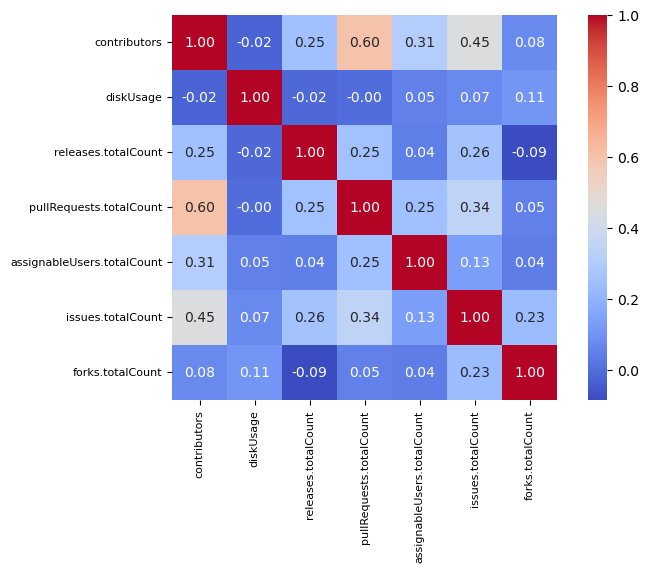

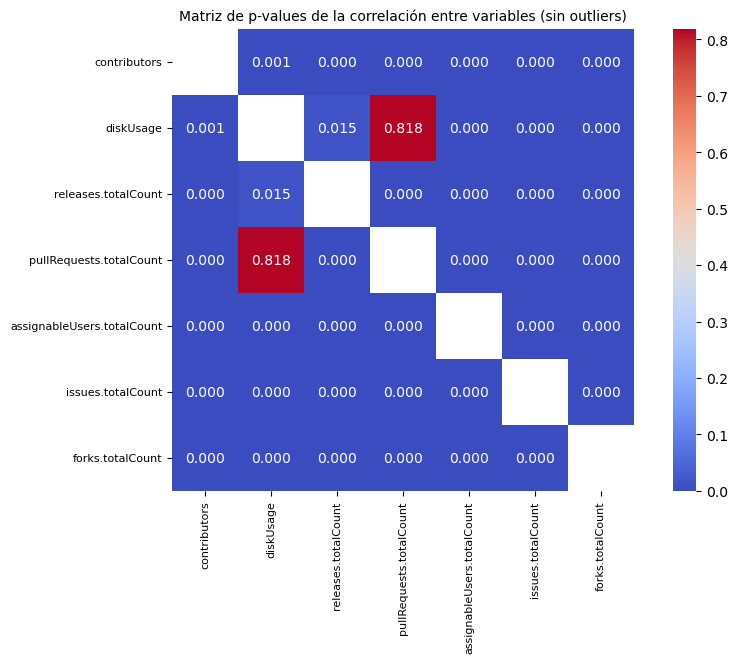

In [66]:
# lo mismo, pero 
# Lista de variables a analizar
variables = [
    'environments.totalCount',
    'deployments.totalCount',
    'milestones.totalCount',
    'contributors',
    'diskUsage',
    'releases.totalCount',
    'pullRequests.totalCount',
    'assignableUsers.totalCount',
    'issues.totalCount',
    'forks.totalCount'
]

LIM = 3  # Factor de multiplicación para definir outliers

# Filtrar el DataFrame para incluir solo las variables seleccionadas
df_filtered = df_copy[variables]

# Paso 1: Eliminar outliers usando el método del rango intercuartílico (IQR)
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    # Filtrar los datos para cada variable
    filtered_df = df.copy()
    for col in df.columns:
        filtered_df = filtered_df[(filtered_df[col] >= (Q1[col] - LIM * IQR[col])) & 
                                  (filtered_df[col] <= (Q3[col] + LIM * IQR[col]))]
    return filtered_df

# Aplicar la función para eliminar outliers
df_filtered_no_outliers = remove_outliers_iqr(df_filtered)

# Paso 2: Filtrar variables constantes
non_constant_variables = df_filtered_no_outliers.var() != 0  # Verificar que la varianza no sea cero
filtered_variables = df_filtered_no_outliers.columns[non_constant_variables].tolist()

# Paso 3: Calcular la matriz de correlación solo con variables no constantes
correlation_matrix = df_filtered_no_outliers[filtered_variables].corr()

# Paso 4: Calcular p-values para la matriz de correlación
results = []
p_values_matrix = pd.DataFrame(index=filtered_variables, columns=filtered_variables)

for i in range(len(filtered_variables)):
    for j in range(len(filtered_variables)):
        if i != j:
            _, p = stats.pearsonr(df_filtered_no_outliers[filtered_variables[i]], df_filtered_no_outliers[filtered_variables[j]])
            results.append({
                'Variable 1': filtered_variables[i],
                'Variable 2': filtered_variables[j],
                'p-value': p,
                'Correlación': correlation_matrix.iloc[i, j]
            })
            p_values_matrix.iloc[i, j] = p
        else:
            p_values_matrix.iloc[i, j] = None

# Convertir resultados a DataFrame
results_df = pd.DataFrame(results)

# Filtrar y ordenar resultados
results_df['Significativa'] = results_df['p-value'] < 0.05
filtered_results = results_df[results_df['Significativa']].sort_values(by=['Correlación', 'p-value'], ascending=[False, True])

# Paso 5: Mostrar resultados
print("Resultados significativos (correlación alta, p-value bajo):")
print(filtered_results[['Variable 1', 'Variable 2', 'Correlación', 'p-value']])

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
#plt.title('Matriz de correlación entre variables numéricas', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# Paso 6: Visualizar la matriz de p-values
plt.figure(figsize=(10, 6))
sns.heatmap(p_values_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".3f", square=True)
plt.title('Matriz de p-values de la correlación entre variables (sin outliers)', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()


C:\Users\carlosLocal\AppData\Local\Temp\ipykernel_20948\2932612539.py:66: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _, p = stats.pearsonr(df[filtered_variables[i]], df[filtered_variables[j]])
C:\Users\carlosLocal\AppData\Local\Temp\ipykernel_20948\2932612539.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _, p = stats.spearmanr(df[filtered_variables[i]], df[filtered_variables[j]])


Resultados significativos de Pearson:
                    Variable 1                  Variable 2  p-value  \
30                contributors                   diskUsage     0,00   
31                contributors         releases.totalCount     0,00   
32                contributors     pullRequests.totalCount     0,00   
33                contributors  assignableUsers.totalCount     0,00   
34                contributors           issues.totalCount     0,00   
35                contributors            forks.totalCount     0,00   
39                   diskUsage                contributors     0,00   
40                   diskUsage         releases.totalCount     0,00   
41                   diskUsage     pullRequests.totalCount     0,00   
42                   diskUsage  assignableUsers.totalCount     0,00   
43                   diskUsage           issues.totalCount     0,00   
44                   diskUsage            forks.totalCount     0,00   
48         releases.totalCount         

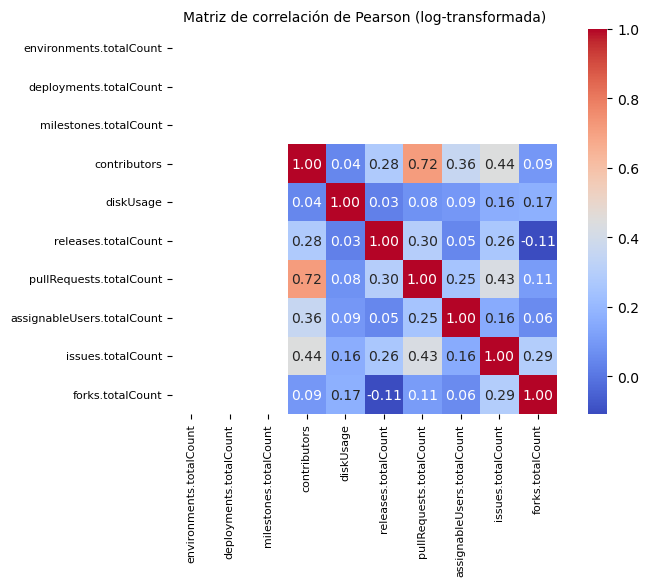

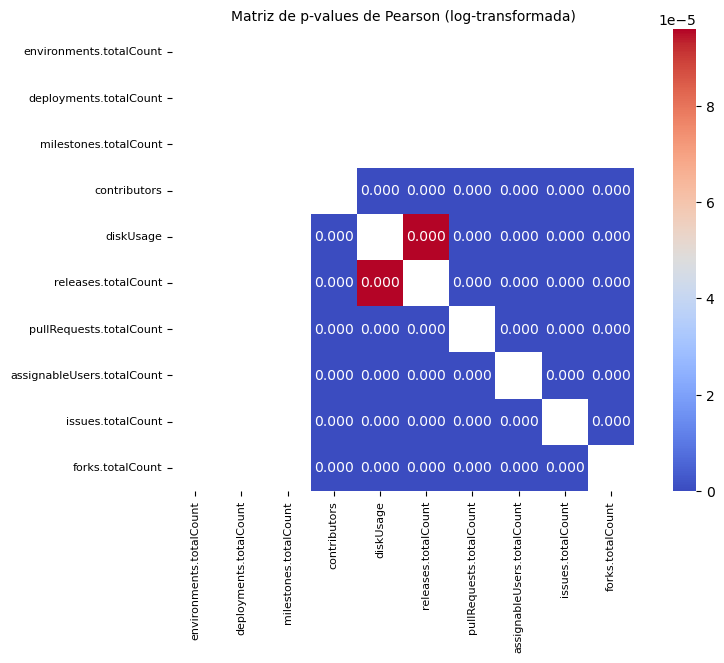

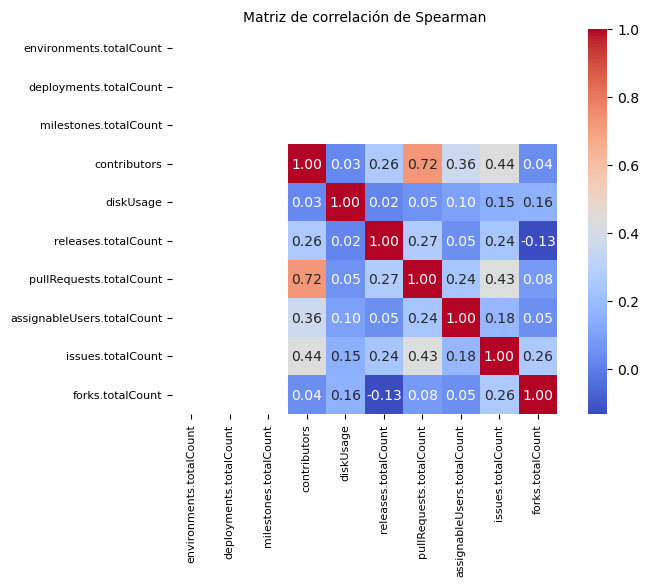

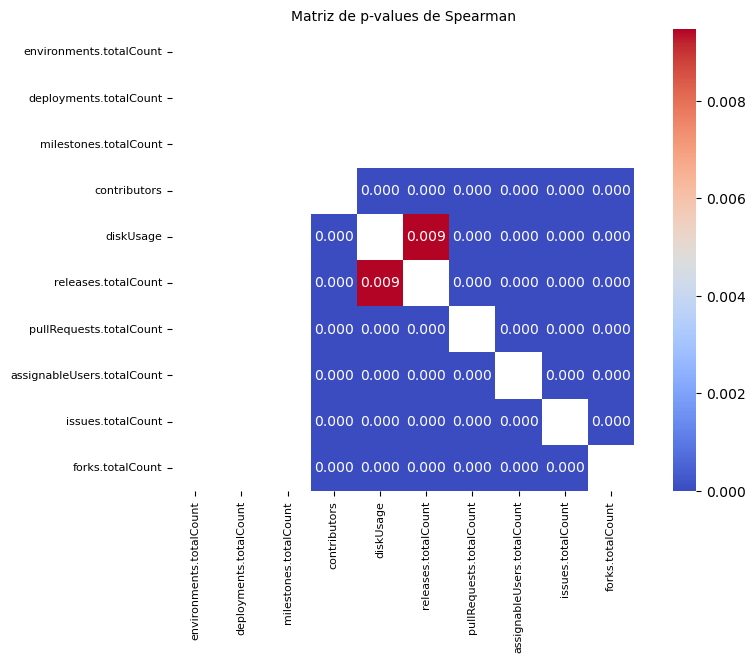

In [71]:
# lo mismo sin outliers, transformando a log y aplicando spearman
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables a analizar
variables = [
    'environments.totalCount',
    'deployments.totalCount',
    'milestones.totalCount',
    'contributors',
    'diskUsage',
    'releases.totalCount',
    'pullRequests.totalCount',
    'assignableUsers.totalCount',
    'issues.totalCount',
    'forks.totalCount'
]

LIM = 3

# Filtrar el DataFrame para incluir solo las variables seleccionadas
df_filtered = df_copy[variables]

# Paso 1: Eliminar outliers usando el método del rango intercuartílico (IQR)
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    # Filtrar los datos
    filtered_df = df[~((df < (Q1 - LIM * IQR)) | (df > (Q3 + LIM * IQR))).any(axis=1)]
    return filtered_df

# Aplicar la función para eliminar outliers
df_filtered_no_outliers = remove_outliers_iqr(df_filtered)

# Paso 2: Filtrar variables constantes. Descomentar y comentar si fuera necesario
# non_constant_variables = df_filtered_no_outliers.var() != 0  # Verificar que la varianza no sea cero
# filtered_variables = df_filtered_no_outliers.columns[non_constant_variables].tolist()
filtered_variables = variables  # Mantener todas las variables

# Listar variables eliminadas
eliminated_variables = [var for var in variables if var not in filtered_variables]
if eliminated_variables:
    print("Variables eliminadas por falta de varianza:", eliminated_variables)

# Paso 3: Aplicar log-transformación para normalizar (evitar log(0))
df_filtered_log = df_filtered_no_outliers.apply(lambda x: np.log1p(x))

# Paso 4: Calcular la matriz de correlación de Pearson
correlation_pearson = df_filtered_log.corr()

# Paso 5: Calcular la matriz de correlación de Spearman
correlation_spearman = df_filtered_no_outliers.corr(method='spearman')

# Paso 6: Calcular p-values para ambas matrices
def calculate_p_values(df, correlation_method):
    p_values_matrix = pd.DataFrame(index=filtered_variables, columns=filtered_variables)
    results = []
    for i in range(len(filtered_variables)):
        for j in range(len(filtered_variables)):
            if i != j:
                if correlation_method == 'pearson':
                    _, p = stats.pearsonr(df[filtered_variables[i]], df[filtered_variables[j]])
                elif correlation_method == 'spearman':
                    _, p = stats.spearmanr(df[filtered_variables[i]], df[filtered_variables[j]])
                
                results.append({
                    'Variable 1': filtered_variables[i],
                    'Variable 2': filtered_variables[j],
                    'p-value': p,
                })
                p_values_matrix.iloc[i, j] = p
            else:
                p_values_matrix.iloc[i, j] = None
    return results, p_values_matrix

# Calcular p-values para Pearson y Spearman
pearson_results, p_values_pearson = calculate_p_values(df_filtered_log, 'pearson')
spearman_results, p_values_spearman = calculate_p_values(df_filtered_no_outliers, 'spearman')

# Convertir resultados a DataFrame
pearson_results_df = pd.DataFrame(pearson_results)
spearman_results_df = pd.DataFrame(spearman_results)

# Filtrar y ordenar resultados
pearson_results_df['Significativa'] = pearson_results_df['p-value'] < 0.05
spearman_results_df['Significativa'] = spearman_results_df['p-value'] < 0.05

print("Resultados significativos de Pearson:")
print(pearson_results_df[pearson_results_df['Significativa']])

print("\nResultados significativos de Spearman:")
print(spearman_results_df[spearman_results_df['Significativa']])

# Paso 6: Visualizar la matriz de correlación de Pearson
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de correlación de Pearson (log-transformada)', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# Paso 7: Visualizar la matriz de p-values de Pearson
plt.figure(figsize=(10, 6))
sns.heatmap(p_values_pearson.astype(float), annot=True, cmap='coolwarm', fmt=".3f", square=True)
plt.title('Matriz de p-values de Pearson (log-transformada)', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# Paso 8: Visualizar la matriz de correlación de Spearman
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de correlación de Spearman', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# Paso 9: Visualizar la matriz de p-values de Spearman
plt.figure(figsize=(10, 6))
sns.heatmap(p_values_spearman.astype(float), annot=True, cmap='coolwarm', fmt=".3f", square=True)
plt.title('Matriz de p-values de Spearman', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()


In [75]:
spearman_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Variable 1     90 non-null     object 
 1   Variable 2     90 non-null     object 
 2   p-value        42 non-null     float64
 3   Significativa  90 non-null     bool   
dtypes: bool(1), float64(1), object(2)
memory usage: 2.3+ KB


In [79]:
# Paso 1: Obtener el coeficiente de Spearman de la matriz
spearman_coefficients = correlation_spearman.values  # Matriz de correlación de Spearman

# Paso 2: Crear un DataFrame para los pares significativos con sus coeficientes
significant_pairs = []

for i in range(len(spearman_results_df)):
    if spearman_results_df['Significativa'].iloc[i]:
        variable1 = spearman_results_df['Variable 1'].iloc[i]
        variable2 = spearman_results_df['Variable 2'].iloc[i]
        spearman_value = spearman_coefficients[variables.index(variable1), variables.index(variable2)]
        
        significant_pairs.append({
            'Variable 1': variable1,
            'Variable 2': variable2,
            'Spearman Correlation': spearman_value,
            #'p-value': spearman_results_df['p-value'].iloc[i]
        })

# Crear un DataFrame con los pares significativos
significant_pairs_df = pd.DataFrame(significant_pairs)

# Ordenar por coeficiente de Spearman
significant_pairs_sorted = significant_pairs_df.sort_values(by='Spearman Correlation', ascending=False)

# Mostrar el listado final
print("Listado de pares significativos ordenados por coeficiente de Spearman:")
print(significant_pairs_sorted)


Listado de pares significativos ordenados por coeficiente de Spearman:
                    Variable 1                  Variable 2  \
18     pullRequests.totalCount                contributors   
2                 contributors     pullRequests.totalCount   
4                 contributors           issues.totalCount   
30           issues.totalCount                contributors   
33           issues.totalCount     pullRequests.totalCount   
22     pullRequests.totalCount           issues.totalCount   
3                 contributors  assignableUsers.totalCount   
24  assignableUsers.totalCount                contributors   
20     pullRequests.totalCount         releases.totalCount   
14         releases.totalCount     pullRequests.totalCount   
41            forks.totalCount           issues.totalCount   
35           issues.totalCount            forks.totalCount   
1                 contributors         releases.totalCount   
12         releases.totalCount                contributors   

In [80]:
# Imprimir el listado final en formato tabla usando print
print("Listado de pares significativos ordenados por coeficiente de Spearman:")
print(significant_pairs_sorted.to_string(index=False))


Listado de pares significativos ordenados por coeficiente de Spearman:
                Variable 1                 Variable 2  Spearman Correlation
   pullRequests.totalCount               contributors                  0,72
              contributors    pullRequests.totalCount                  0,72
              contributors          issues.totalCount                  0,44
         issues.totalCount               contributors                  0,44
         issues.totalCount    pullRequests.totalCount                  0,43
   pullRequests.totalCount          issues.totalCount                  0,43
              contributors assignableUsers.totalCount                  0,36
assignableUsers.totalCount               contributors                  0,36
   pullRequests.totalCount        releases.totalCount                  0,27
       releases.totalCount    pullRequests.totalCount                  0,27
          forks.totalCount          issues.totalCount                  0,26
         issues.t

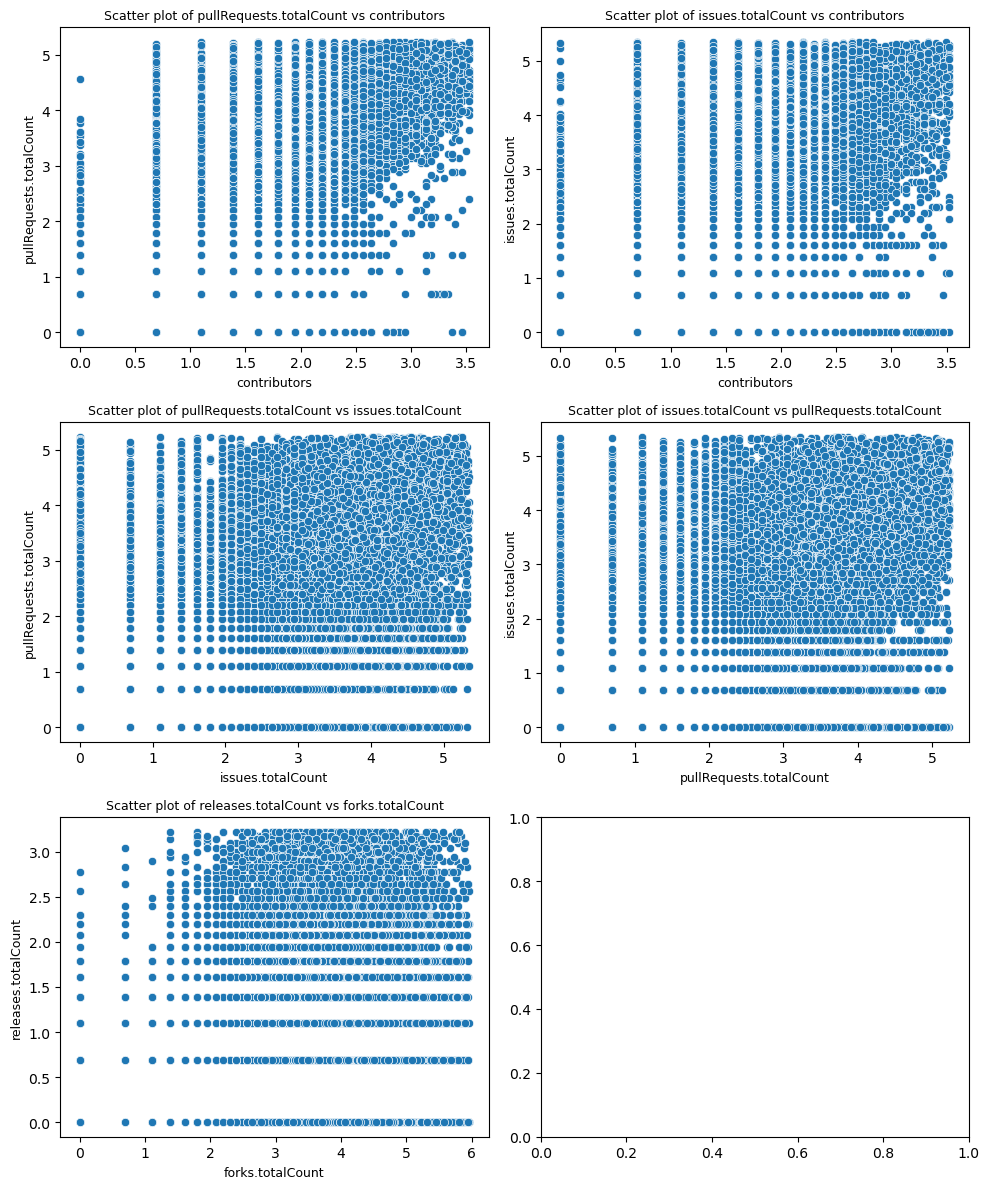

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de pares de variables para graficar
variable_pairs = [
    ('contributors', 'pullRequests.totalCount'),
    ('contributors', 'issues.totalCount'),
    ('issues.totalCount', 'pullRequests.totalCount'),
    ('pullRequests.totalCount', 'issues.totalCount'),
    ('forks.totalCount', 'releases.totalCount')
]

LIM = 3

# Filtrar el DataFrame para incluir solo las variables seleccionadas
df_filtered = df_copy[list(set([item for pair in variable_pairs for item in pair]))]

# Paso 1: Eliminar outliers usando el método del rango intercuartílico (IQR)
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    # Filtrar los datos
    return df[~((df < (Q1 - LIM * IQR)) | (df > (Q3 + LIM * IQR))).any(axis=1)]

# Paso 2: Aplicar la función para eliminar outliers
df_filtered_no_outliers = remove_outliers_iqr(df_filtered)

# Paso 3: Normalizar (log-transformación para evitar log(0))
df_filtered_log = df_filtered_no_outliers.apply(lambda x: np.log1p(x))

# Paso 4: Crear scatter plots en una cuadrícula de 2 columnas
num_plots = len(variable_pairs)
cols = 2
rows = (num_plots + cols - 1) // cols  # Calcular número de filas necesarias

fig, axes = plt.subplots(rows, cols, figsize=(10, 4 * rows))  # Tamaño ajustado

for ax, (x_var, y_var) in zip(axes.flatten(), variable_pairs):
    sns.scatterplot(data=df_filtered_log, x=x_var, y=y_var, ax=ax)
    ax.set_title(f'Scatter plot of {y_var} vs {x_var}', fontsize=9)
    ax.set_xlabel(x_var, fontsize=9)
    ax.set_ylabel(y_var, fontsize=9)

# Ajustar el layout
plt.tight_layout()
plt.show()
